# 01 -  Importação das bibliotecas e base de dados

In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [351]:
ifood_df = pd.read_csv('./datasets/ifood_df.csv')

In [352]:
ifood_df.shape

(2205, 39)

In [353]:
ifood_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [354]:
ifood_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# 02 - Tratamento para melhor entendimentos dos dados

In [355]:
ifood_df.columns = ['Renda_anual', 'N_criancas', 'N_adolescentes', 'Recency', 'N_dias_ultima_compra', 'Gastos_Frutas',
       'Gastos_carne', 'Gastos_peixe', 'Gastos_doce',
       'Gastos_ouro', 'Compras_desconto', 'Compras_site_empresa',
       'Compras_catalago', 'Compras_lojas', 'N_visitas_site_empresa',
       'Aceita_campanha3', 'Aceita_campanha4', 'Aceita_campanha5', 'AcceptedCmp1',
       'Aceita_campanha2', 'Reclamacoes', 'Curto_contato', 'Z_Revenue', 'Oferta_ultima_campanha',
       'Idade', 'Cliente_Dias', 'marital_divorciado', 'marital_casado',
       'marital_solteiro', 'casados juntos', 'viúva conjugal',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall']

<AxesSubplot:>

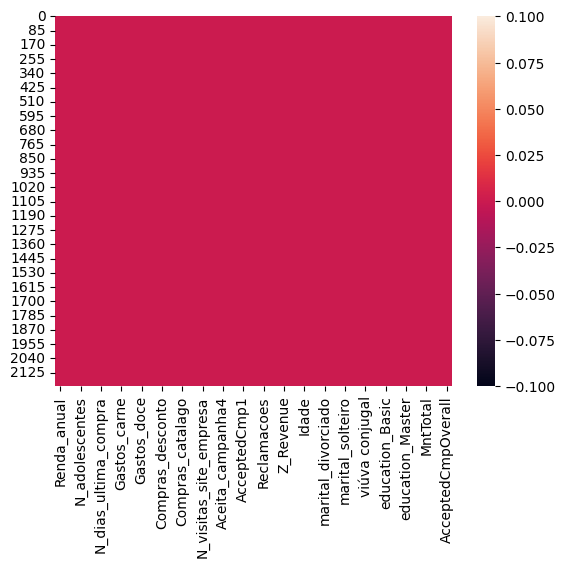

In [356]:
sns.heatmap(ifood_df.isnull())

In [357]:
ifood_df.isnull().sum()

Renda_anual               0
N_criancas                0
N_adolescentes            0
Recency                   0
N_dias_ultima_compra      0
Gastos_Frutas             0
Gastos_carne              0
Gastos_peixe              0
Gastos_doce               0
Gastos_ouro               0
Compras_desconto          0
Compras_site_empresa      0
Compras_catalago          0
Compras_lojas             0
N_visitas_site_empresa    0
Aceita_campanha3          0
Aceita_campanha4          0
Aceita_campanha5          0
AcceptedCmp1              0
Aceita_campanha2          0
Reclamacoes               0
Curto_contato             0
Z_Revenue                 0
Oferta_ultima_campanha    0
Idade                     0
Cliente_Dias              0
marital_divorciado        0
marital_casado            0
marital_solteiro          0
casados juntos            0
viúva conjugal            0
education_2n Cycle        0
education_Basic           0
education_Graduation      0
education_Master          0
education_PhD       

In [358]:
ifood_df.duplicated().sum()

184

In [359]:
ifood_df.drop_duplicates(keep=False, inplace=True)
ifood_df.shape

(1843, 39)

In [360]:
ifood_df.describe()

,Renda_anual,N_criancas,N_adolescentes,Recency,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,...,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,...,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,51755.752577,0.443842,0.512751,48.734129,307.167119,26.308193,166.813348,37.400977,27.416712,43.837222,...,0.244710,0.034726,0.091156,0.023874,0.500271,0.166576,0.218123,565.106348,521.269126,0.305480
std,20727.936663,0.534853,0.548639,28.951696,337.913890,39.733319,222.103689,54.895591,42.066386,51.690589,...,0.430032,0.183135,0.287909,0.152698,0.500136,0.372698,0.413083,577.679708,555.773676,0.680508
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35683.000000,0.000000,0.000000,24.000000,23.500000,2.000000,16.000000,2.500000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51650.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,344.000000,290.000000,0.000000
75%,68145.000000,1.000000,1.000000,74.000000,508.000000,33.000000,225.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.500000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


# 03 - Visualização dos dados

array([[<AxesSubplot:title={'center':'Renda_anual'}>,
        <AxesSubplot:title={'center':'N_criancas'}>,
        <AxesSubplot:title={'center':'N_adolescentes'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'N_dias_ultima_compra'}>,
        <AxesSubplot:title={'center':'Gastos_Frutas'}>],
       [<AxesSubplot:title={'center':'Gastos_carne'}>,
        <AxesSubplot:title={'center':'Gastos_peixe'}>,
        <AxesSubplot:title={'center':'Gastos_doce'}>,
        <AxesSubplot:title={'center':'Gastos_ouro'}>,
        <AxesSubplot:title={'center':'Compras_desconto'}>,
        <AxesSubplot:title={'center':'Compras_site_empresa'}>],
       [<AxesSubplot:title={'center':'Compras_catalago'}>,
        <AxesSubplot:title={'center':'Compras_lojas'}>,
        <AxesSubplot:title={'center':'N_visitas_site_empresa'}>,
        <AxesSubplot:title={'center':'Aceita_campanha3'}>,
        <AxesSubplot:title={'center':'Aceita_campanha4'}>,
        <AxesSubplot:title=

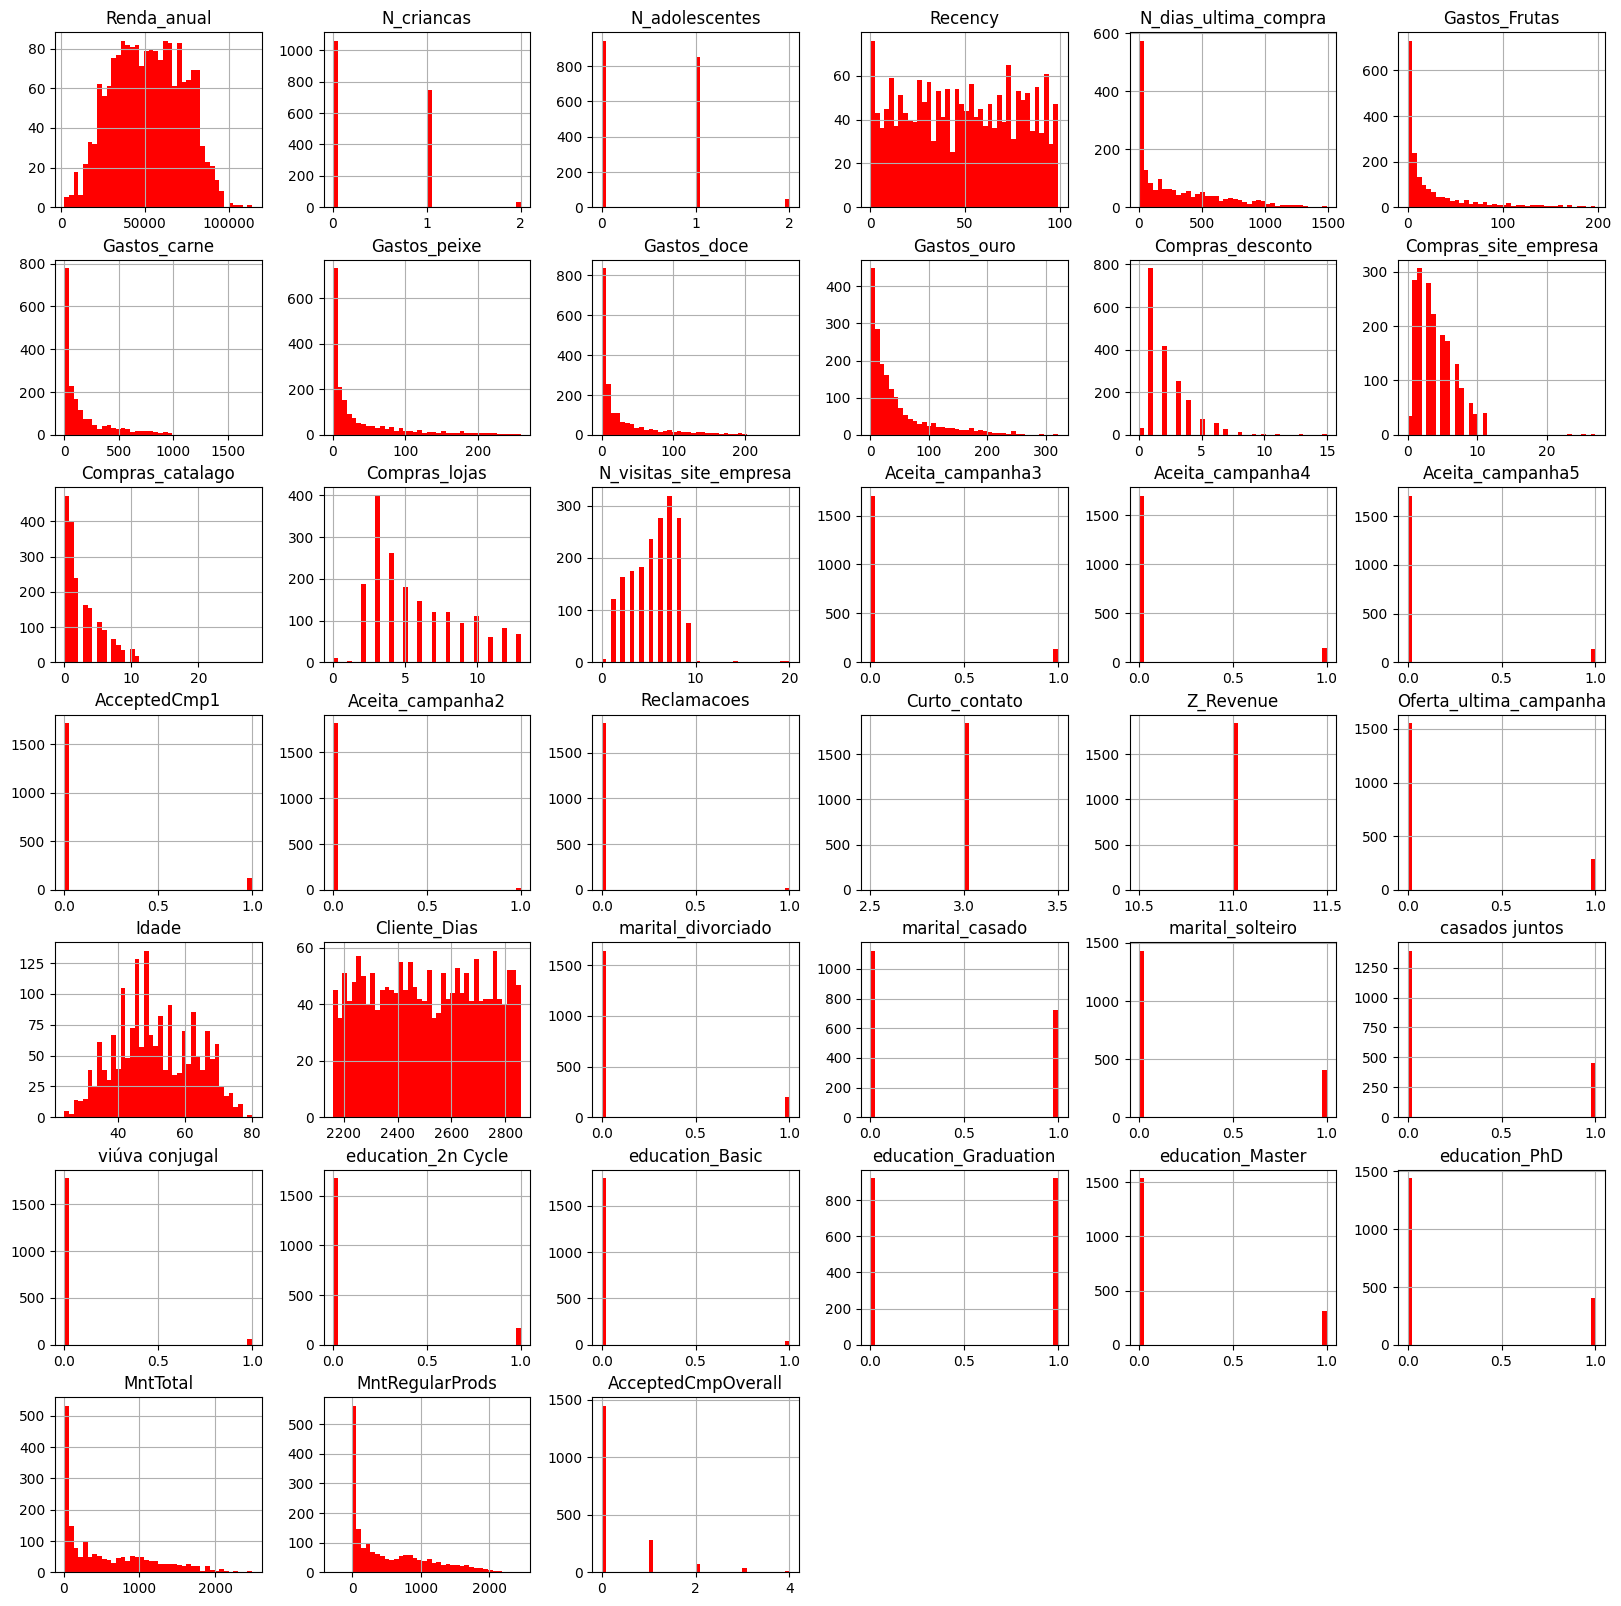

In [361]:
# plt.figure(figsize=(10,50))
# for i in range(len(ifood_df.columns)):
#   plt.subplot(39, 1, i + 1)
#   # sns.distplot(ifood_df[ifood_df.columns[i]], kde = True)
#   plt.title(ifood_df.columns[i])
# plt.tight_layout();
ifood_df.hist(bins = 40, figsize=(20,20), color ='r')

In [362]:
ifood_df.columns

Index(['Renda_anual', 'N_criancas', 'N_adolescentes', 'Recency',
       'N_dias_ultima_compra', 'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa', 'Aceita_campanha3', 'Aceita_campanha4',
       'Aceita_campanha5', 'AcceptedCmp1', 'Aceita_campanha2', 'Reclamacoes',
       'Curto_contato', 'Z_Revenue', 'Oferta_ultima_campanha', 'Idade',
       'Cliente_Dias', 'marital_divorciado', 'marital_casado',
       'marital_solteiro', 'casados juntos', 'viúva conjugal',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [363]:
if_renda = pd.DataFrame(ifood_df[['Renda_anual', 'Idade', 'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa']])

In [364]:
correlations = if_renda.corr()

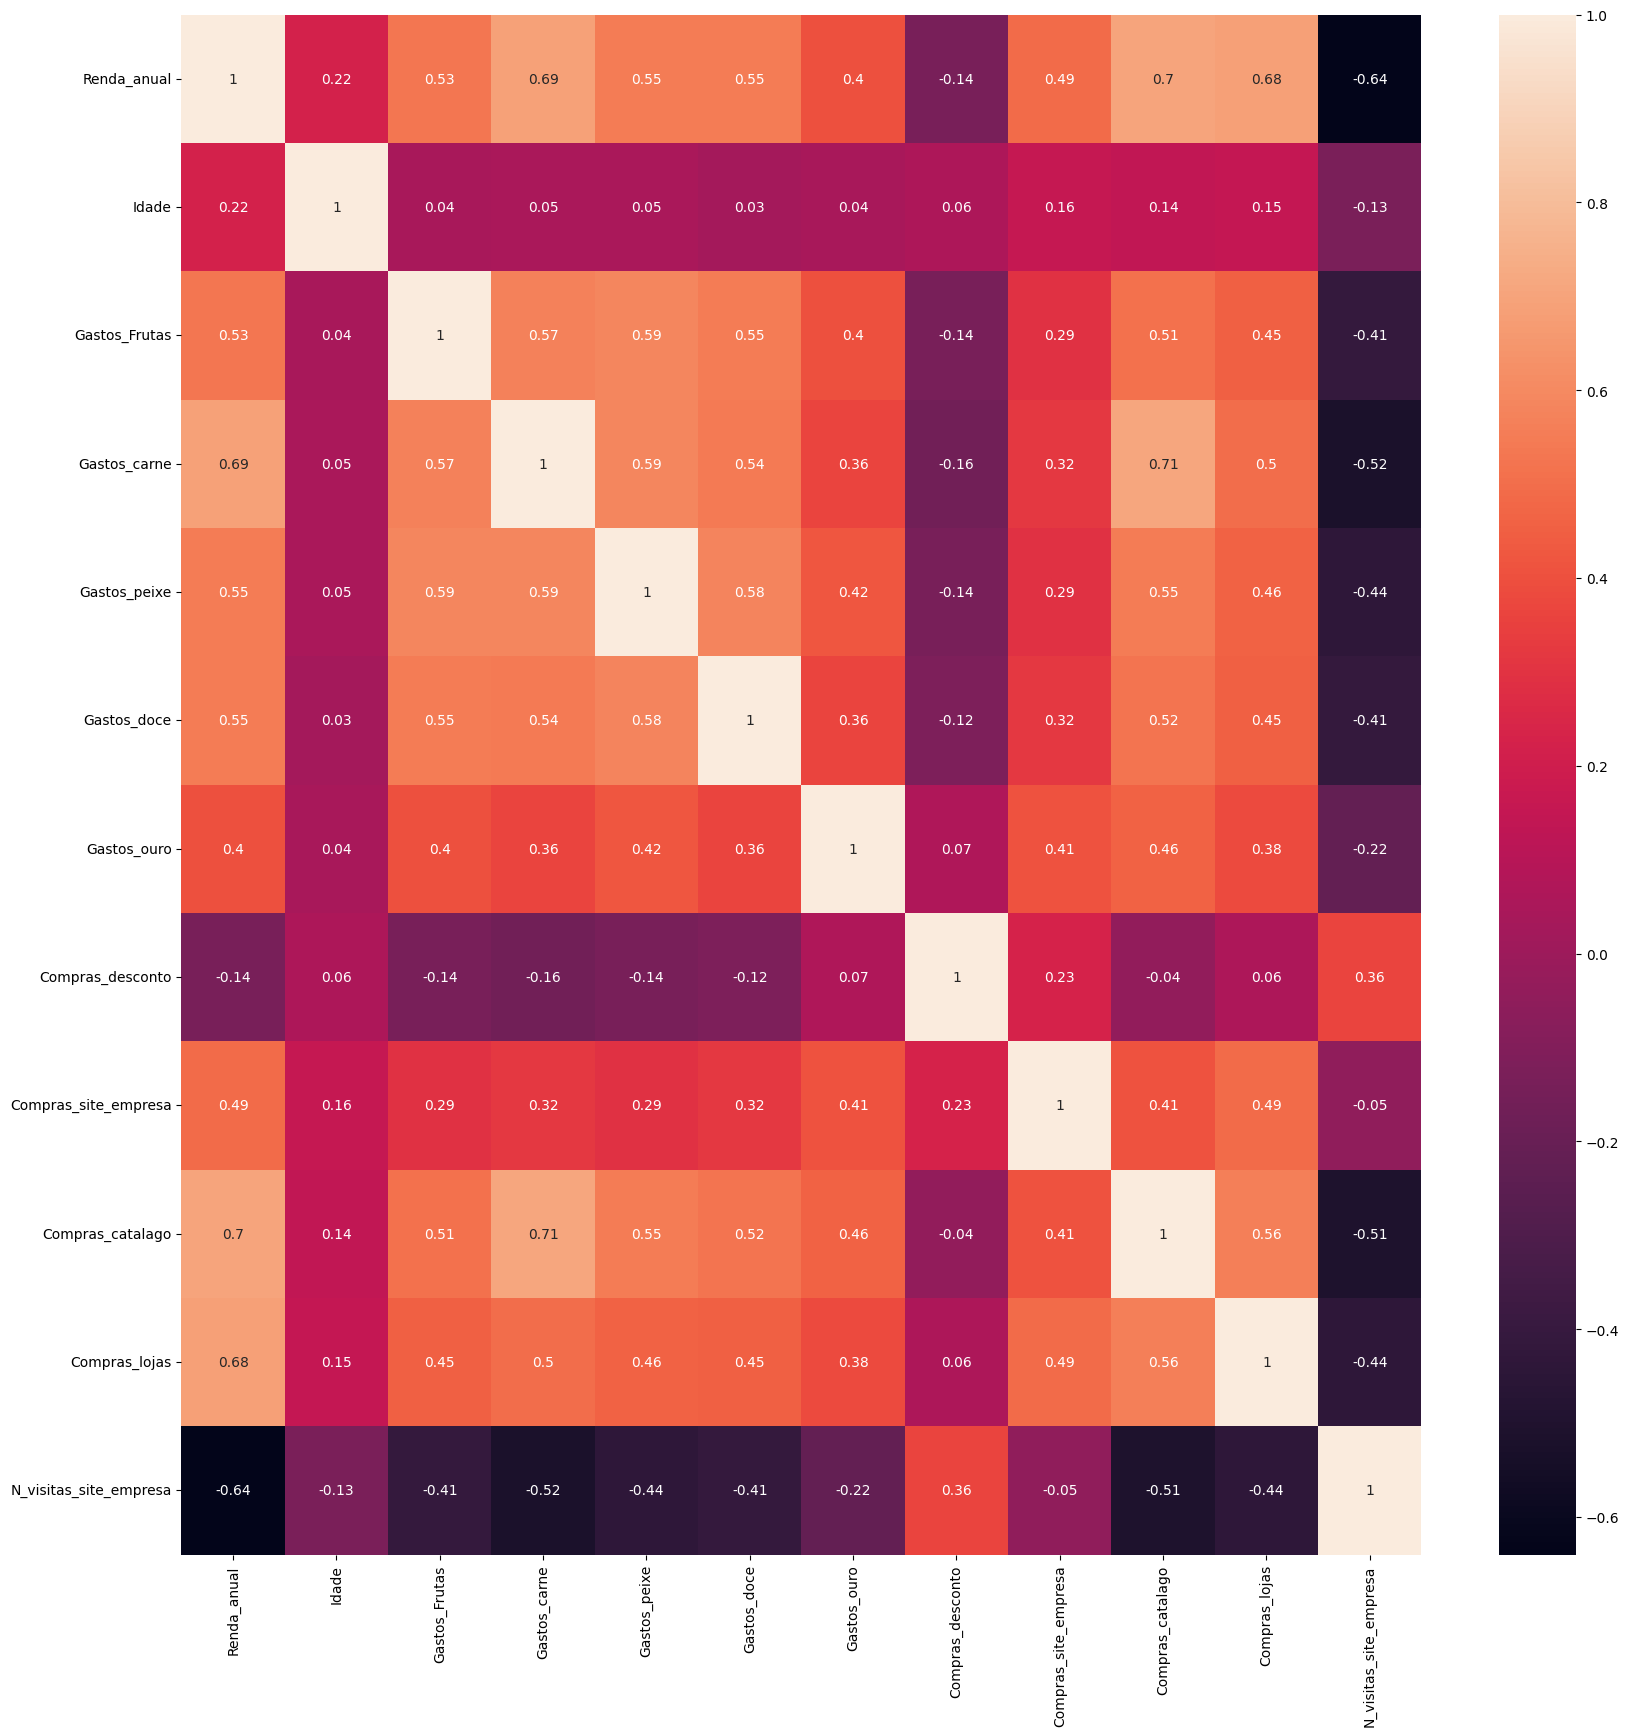

In [365]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), annot=True);

01 - A renda_anual tem uma correlação significativa com os gastos com alimentos

In [366]:
if_status_social = pd.DataFrame(ifood_df[['marital_divorciado', 'marital_casado',
       'marital_solteiro', 'casados juntos', 'viúva conjugal', 'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa']])

In [367]:
correlations = if_status_social.corr()

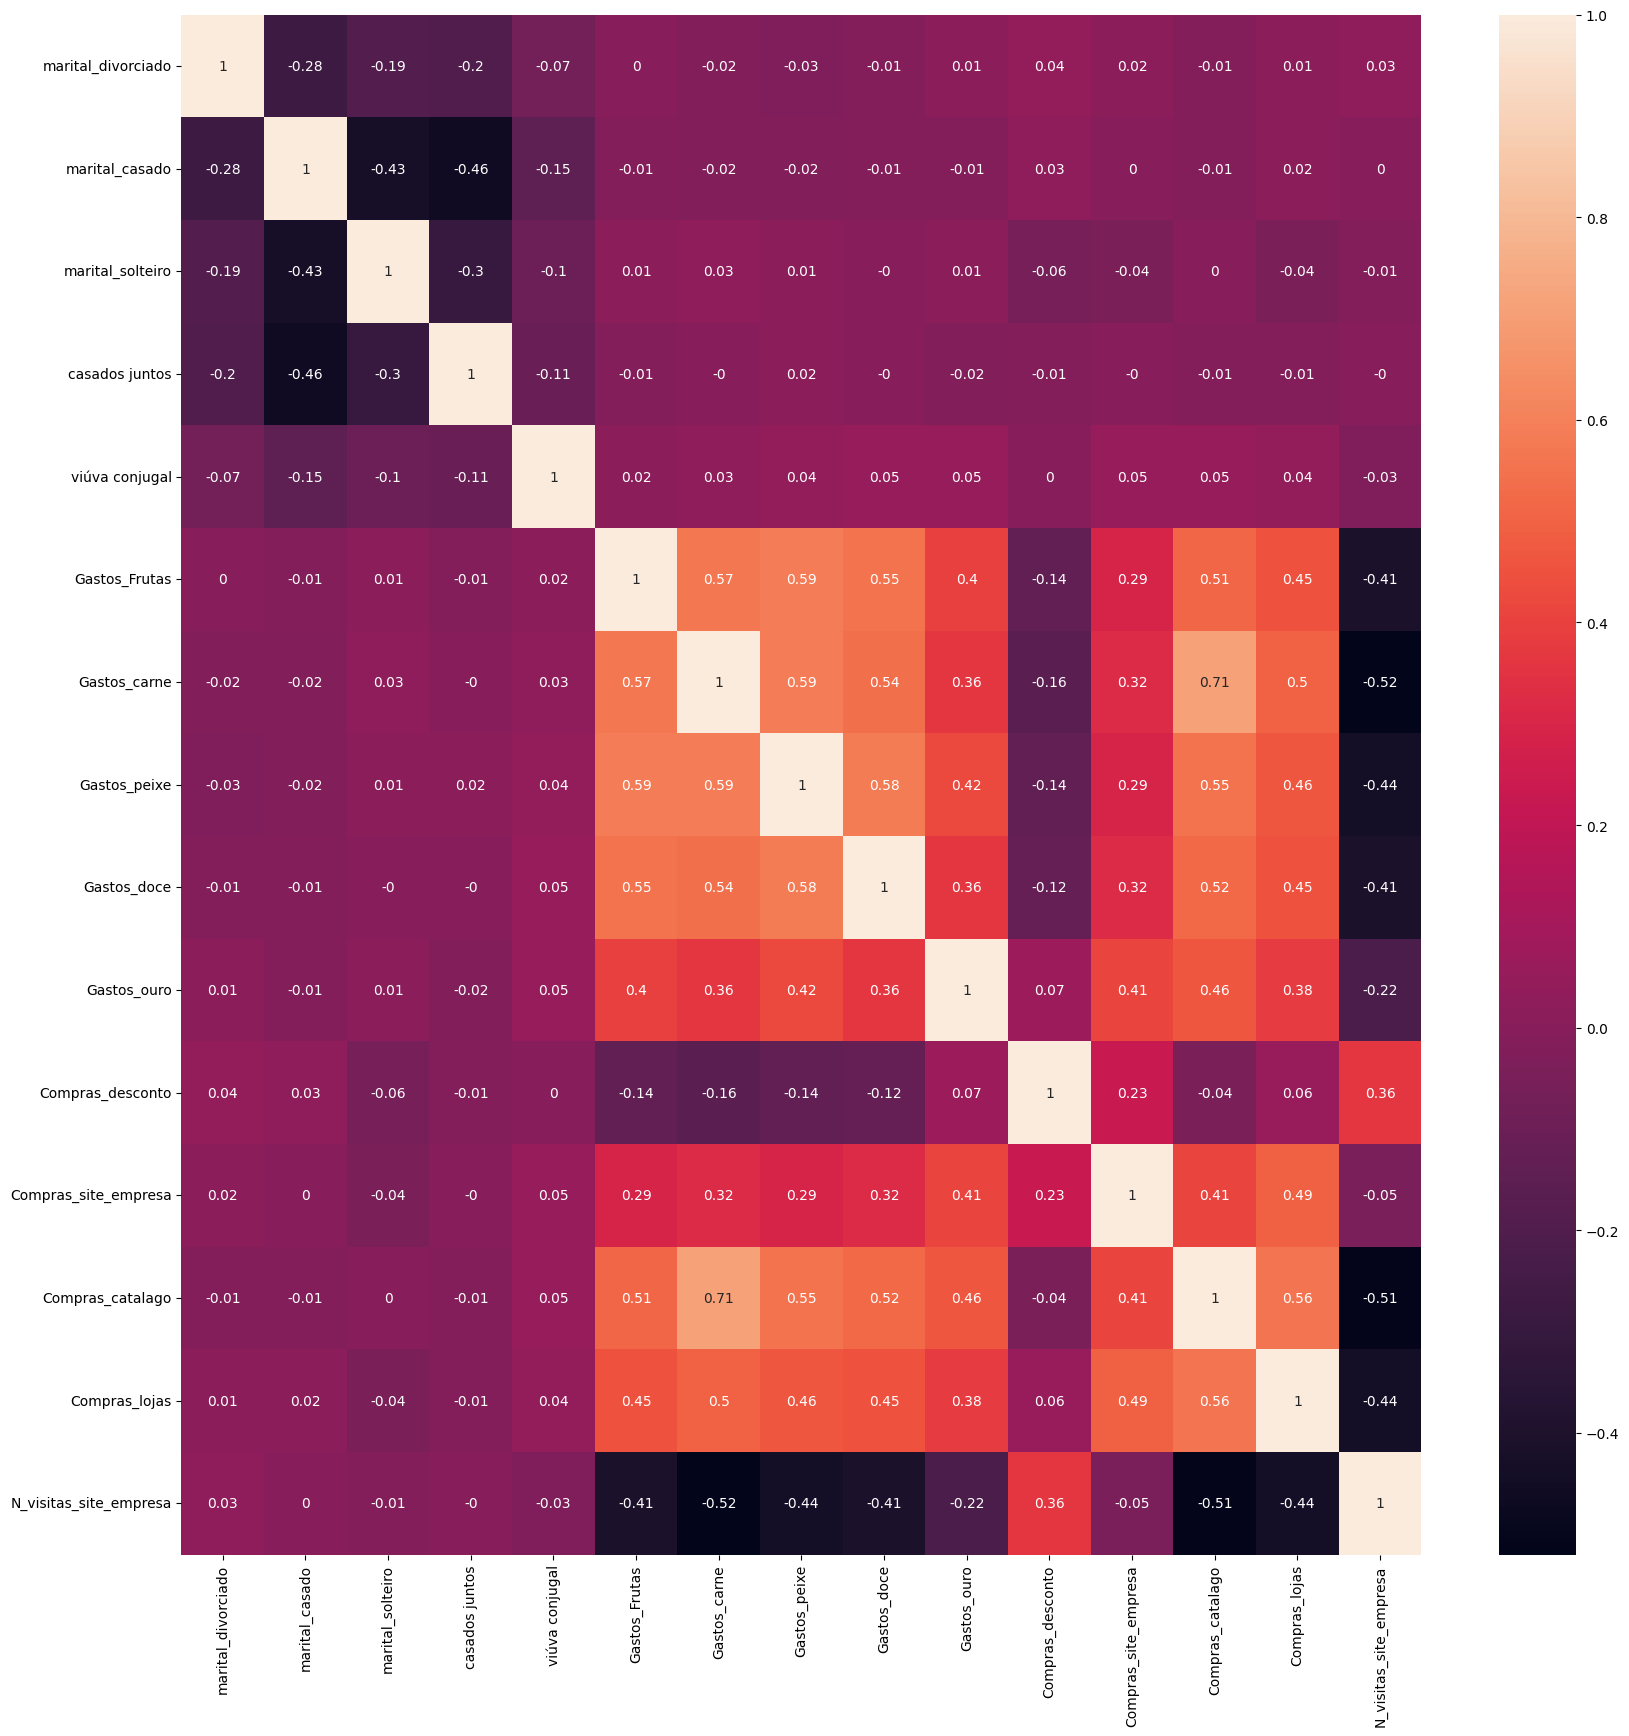

In [368]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), annot=True);

02 - o status_social não tem uma boa correlação com os gastos com alimentos

In [369]:
if_filhos = pd.DataFrame(ifood_df[['N_criancas', 'N_adolescentes', 'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa']])

In [370]:
correlations = if_filhos.corr()

<AxesSubplot:>

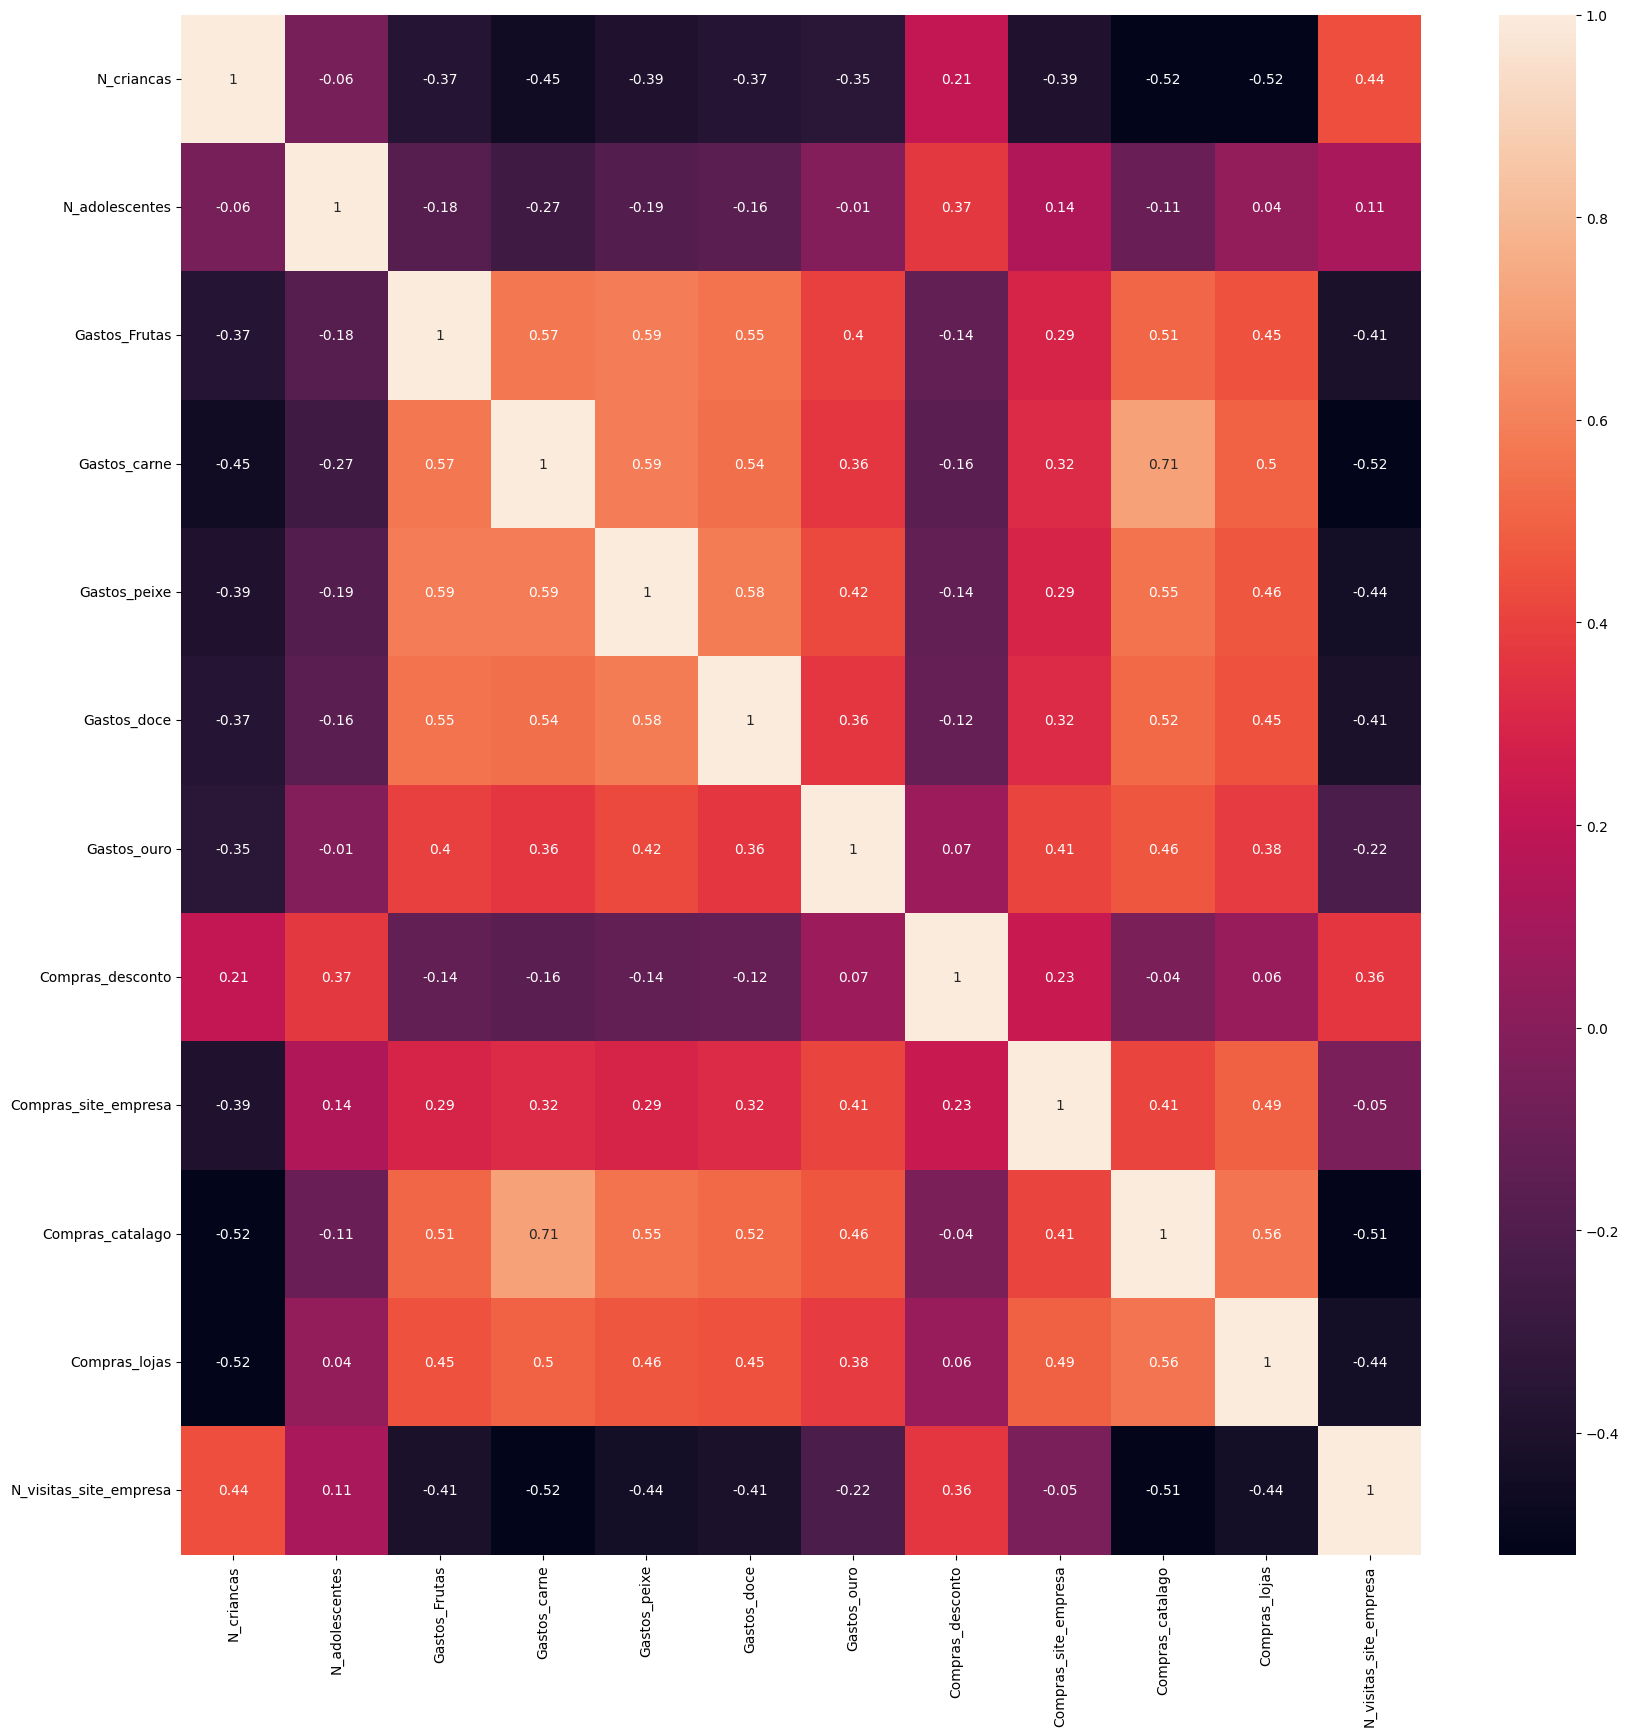

In [371]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), annot=True)

03 - conclusão: o numero de filhos não tem uma correlação significativa nos gastos com alimentos

In [372]:
if_education = pd.DataFrame(ifood_df[['education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD',  'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa']])

In [373]:
correlations = if_education.corr()

<AxesSubplot:>

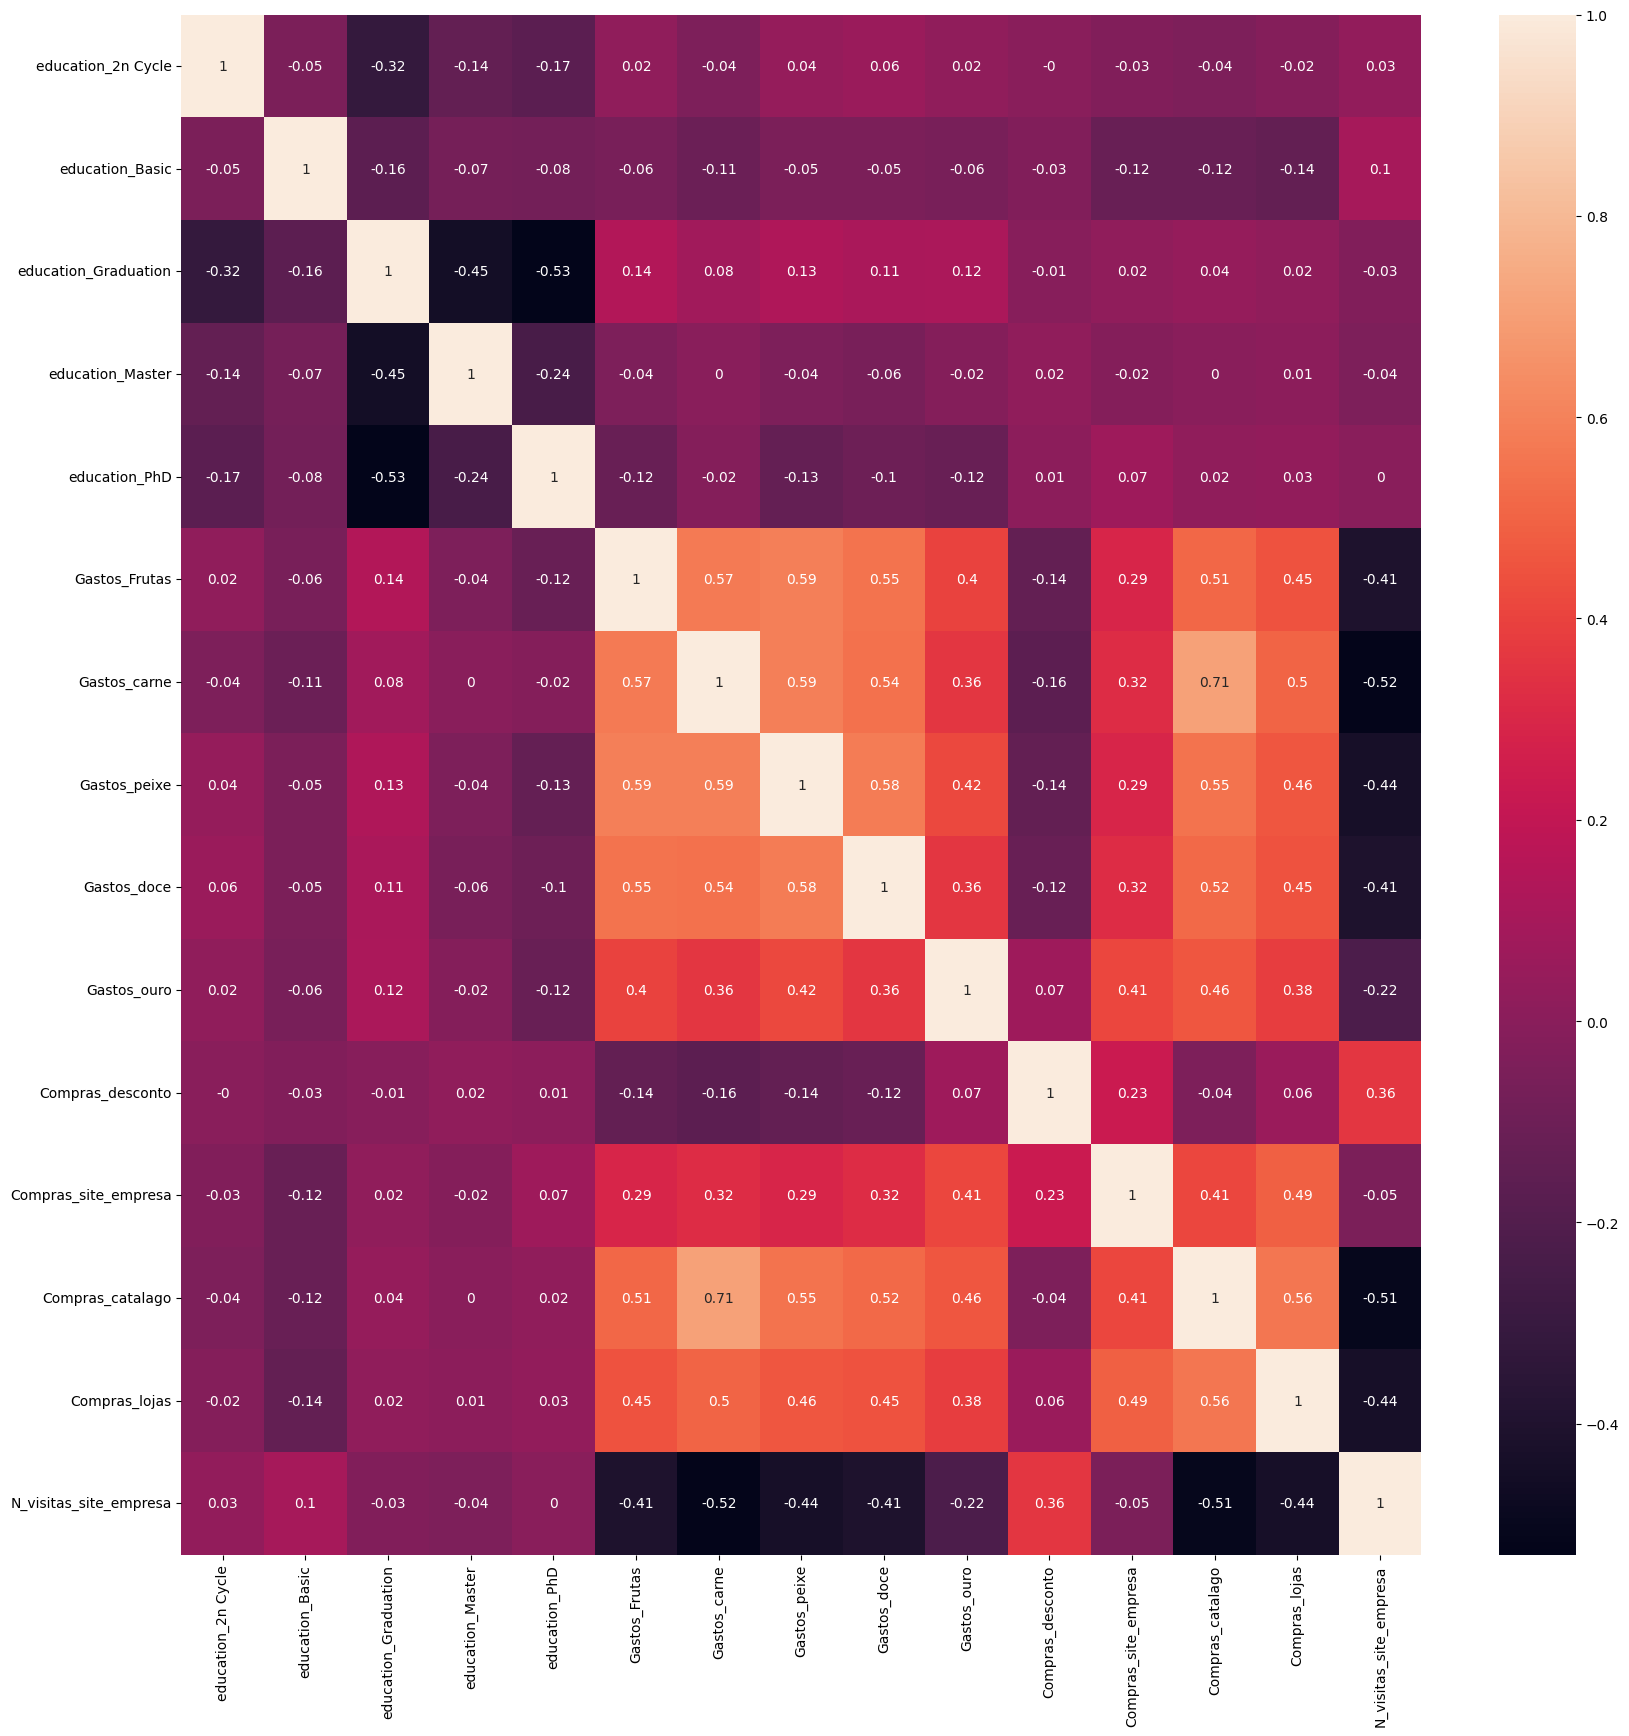

In [374]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), annot=True)

04 - O nivel de escolaridade não tem uma boa correlação com os gastos com alimentos

In [375]:
from matplotlib.pyplot import annotate

In [376]:
f_cmp = pd.DataFrame(ifood_df[['Aceita_campanha3', 'Aceita_campanha4',
       'Aceita_campanha5', 'AcceptedCmp1', 'Aceita_campanha2', 'Oferta_ultima_campanha']].sum(), columns=['Total']).reset_index()

In [377]:
f_cmp

,index,Total
0,Aceita_campanha3,139
1,Aceita_campanha4,146
2,Aceita_campanha5,132
3,AcceptedCmp1,124
4,Aceita_campanha2,22
5,Oferta_ultima_campanha,289


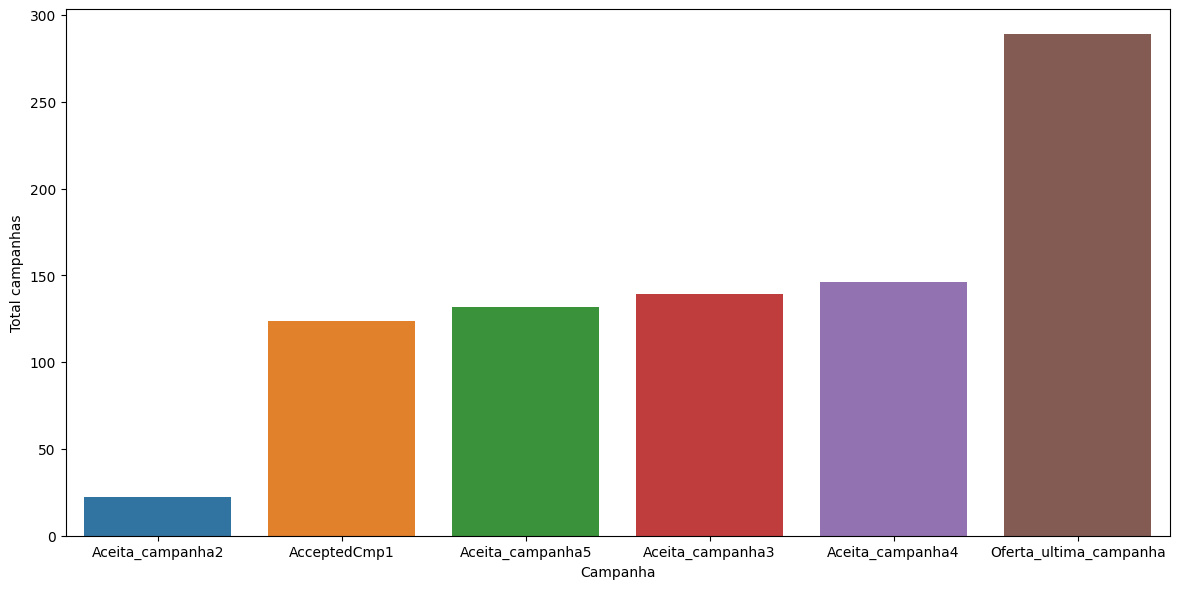

In [378]:
plt.figure(figsize=(12,6))
sns.barplot(x = "index", y = "Total", data = f_cmp.sort_values('Total'))
plt.xlabel('Campanha')
plt.ylabel('Total campanhas')
plt.tight_layout()

- As ofertas da ultima campanha tiveram mais aceitação pelo publico do que as demais campanhas

In [379]:
f_edc = pd.DataFrame(ifood_df[['education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD']].sum(), columns=['Total']).reset_index()

In [380]:
f_edc

,index,Total
0,education_2n Cycle,168
1,education_Basic,44
2,education_Graduation,922
3,education_Master,307
4,education_PhD,402


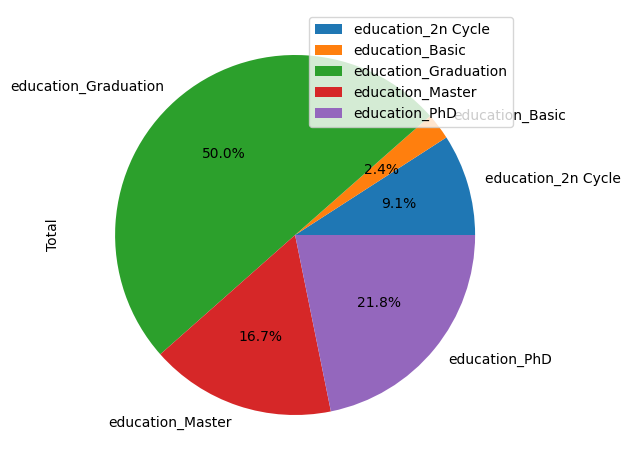

In [381]:
f_edc['Total'].plot.pie(autopct ='%1.1f%%', labels=f_edc['index'], legend= True)
plt.legend(loc='upper right')
plt.tight_layout()

- o nivel de education_graduation é maior, ou seja, pessoas com esse nivel de escolaridade tendem a comprar mais

# 04 -  Agrupamento com K-Means

01 - Primeiro agrupameto baseado na renda_anual

In [382]:
if_renda.head(), if_renda.shape

(   Renda_anual  Idade  Gastos_Frutas  Gastos_carne  Gastos_peixe  Gastos_doce  \
 0      58138.0     63             88           546           172           88   
 1      46344.0     66              1             6             2            1   
 2      71613.0     55             49           127           111           21   
 3      26646.0     36              4            20            10            3   
 4      58293.0     39             43           118            46           27   
 
    Gastos_ouro  Compras_desconto  Compras_site_empresa  Compras_catalago  \
 0           88                 3                     8                10   
 1            6                 2                     1                 1   
 2           42                 1                     8                 2   
 3            5                 2                     2                 0   
 4           15                 5                     5                 3   
 
    Compras_lojas  N_visitas_site_empresa 

In [383]:
def agrupamento(f_coluna):
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(f_coluna)
    labels = kmeans.labels_

    return kmeans, labels

In [384]:
kmeans, labels = agrupamento(if_renda)

In [385]:
scaler = StandardScaler()
ifood_df_scaled = scaler.fit_transform(if_renda)

In [386]:
labels, len(labels)

(array([2, 0, 1, ..., 2, 1, 2], dtype=int32), 1843)

In [387]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([522, 450, 523, 348]))

In [388]:
kmeans.cluster_centers_

array([[4.05808812e+04, 5.04195402e+01, 7.95593870e+00, 4.23122605e+01,
        1.22452107e+01, 7.76245211e+00, 2.55613027e+01, 2.54597701e+00,
        3.06896552e+00, 9.78927203e-01, 3.93103448e+00, 6.42337165e+00],
       [7.87540356e+04, 5.24266667e+01, 6.10355556e+01, 4.41415556e+02,
        9.01666667e+01, 6.72000000e+01, 7.17155556e+01, 1.41777778e+00,
        5.40000000e+00, 5.65777778e+00, 8.40222222e+00, 2.97555556e+00],
       [5.92194092e+04, 5.47074570e+01, 2.86328872e+01, 1.50783939e+02,
        3.68738050e+01, 2.70860421e+01, 5.57552581e+01, 3.06500956e+00,
        5.51434034e+00, 3.14722753e+00, 7.36902486e+00, 5.10898662e+00],
       [2.23895546e+04, 4.51752874e+01, 5.43678161e+00, 2.25660920e+01,
        7.69540230e+00, 5.95114943e+00, 1.72902299e+01, 2.14655172e+00,
        2.02011494e+00, 4.82758621e-01, 2.83908046e+00, 7.15229885e+00]])

In [389]:
renda_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [if_renda.columns])
renda_centers

,Renda_anual,Idade,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa
0,40580.881226,50.419540,7.955939,42.312261,12.245211,7.762452,25.561303,2.545977,3.068966,0.978927,3.931034,6.423372
1,78754.035556,52.426667,61.035556,441.415556,90.166667,67.200000,71.715556,1.417778,5.400000,5.657778,8.402222,2.975556
2,59219.409178,54.707457,28.632887,150.783939,36.873805,27.086042,55.755258,3.065010,5.514340,3.147228,7.369025,5.108987
3,22389.554598,45.175287,5.436782,22.566092,7.695402,5.951149,17.290230,2.146552,2.020115,0.482759,2.839080,7.152299


In [390]:
renda_centers = scaler.inverse_transform(renda_centers)
renda_centers = pd.DataFrame(data = renda_centers, columns = [if_renda.columns])
renda_centers

,Renda_anual,Idade,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa
0,8.409815e+08,637.219389,342.338274,9561.972596,709.426661,353.866421,1364.757515,7.177453,12.647893,5.381308,18.444965,21.023954
1,1.632017e+09,660.550484,2450.795393,98180.235144,4985.810375,2853.510861,3749.850716,5.034885,19.114609,18.469371,32.836329,12.608732
2,1.227215e+09,687.062683,1163.679154,33647.395555,2061.061048,1166.519465,2925.077385,8.163150,19.431810,11.446655,29.510788,17.815882
3,4.640151e+08,576.259522,242.270959,5177.465694,459.730009,277.692137,937.336893,6.418903,9.738189,3.993385,14.930304,22.803076


In [391]:
labels_df = pd.DataFrame({'cluster': labels})
labels_df

,cluster
0,2
1,0
2,1
3,3
4,2
...,...
1838,3
1839,2
1840,2
1841,1


In [392]:
ifood_df_cluster = if_renda.join(labels_df)
ifood_df_cluster.head()

,Renda_anual,Idade,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa,cluster
0,58138.0,63,88,546,172,88,88,3,8,10,4,7,2.0
1,46344.0,66,1,6,2,1,6,2,1,1,2,5,0.0
2,71613.0,55,49,127,111,21,42,1,8,2,10,4,1.0
3,26646.0,36,4,20,10,3,5,2,2,0,4,6,3.0
4,58293.0,39,43,118,46,27,15,5,5,3,6,5,2.0


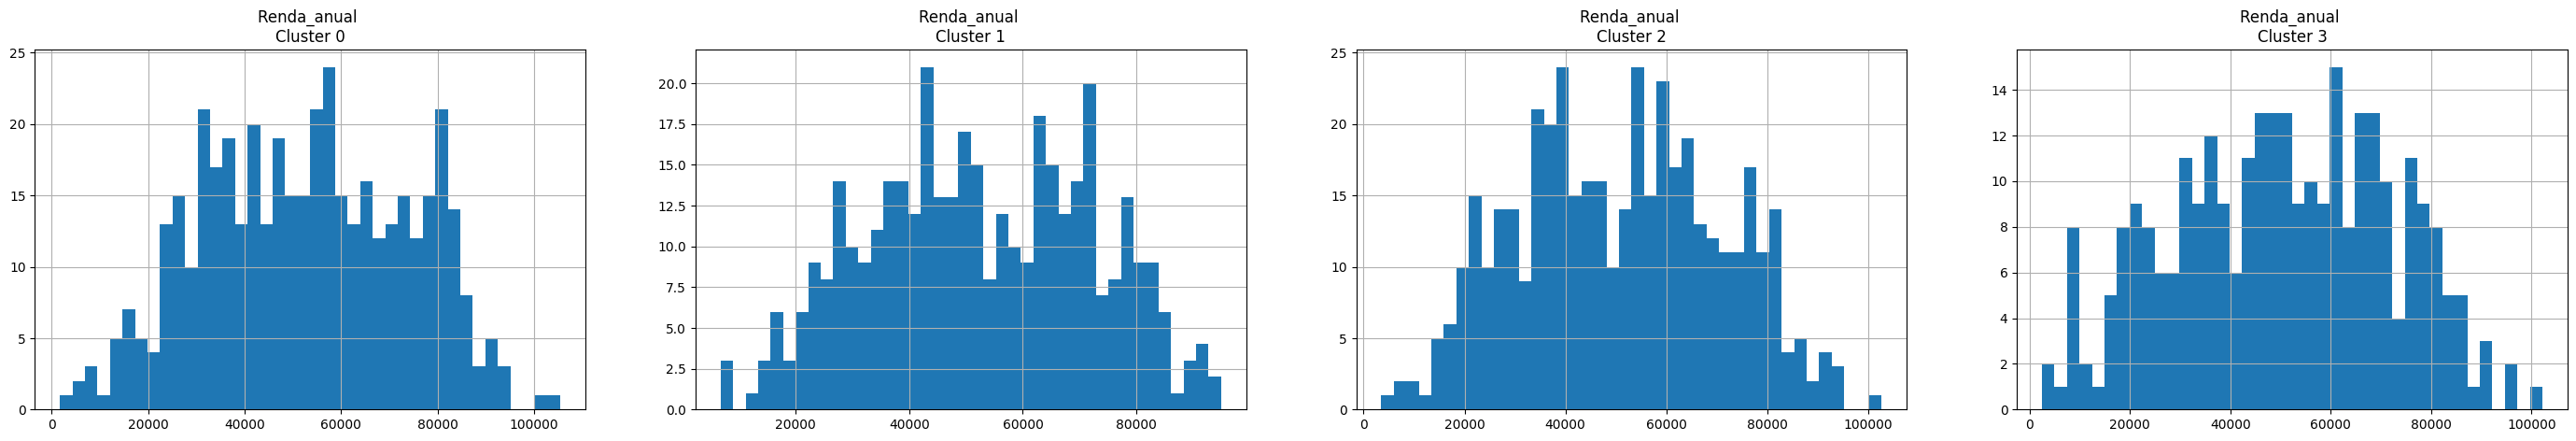

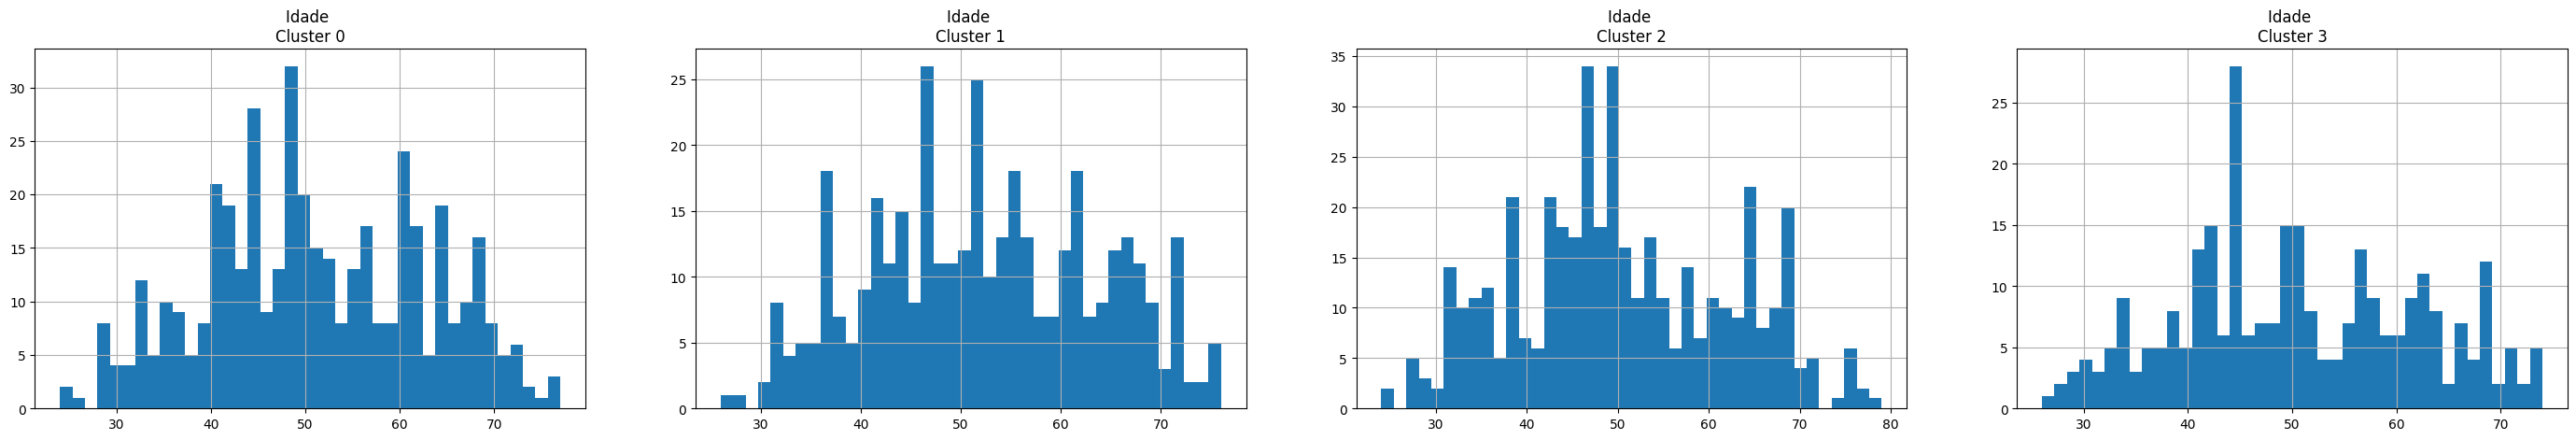

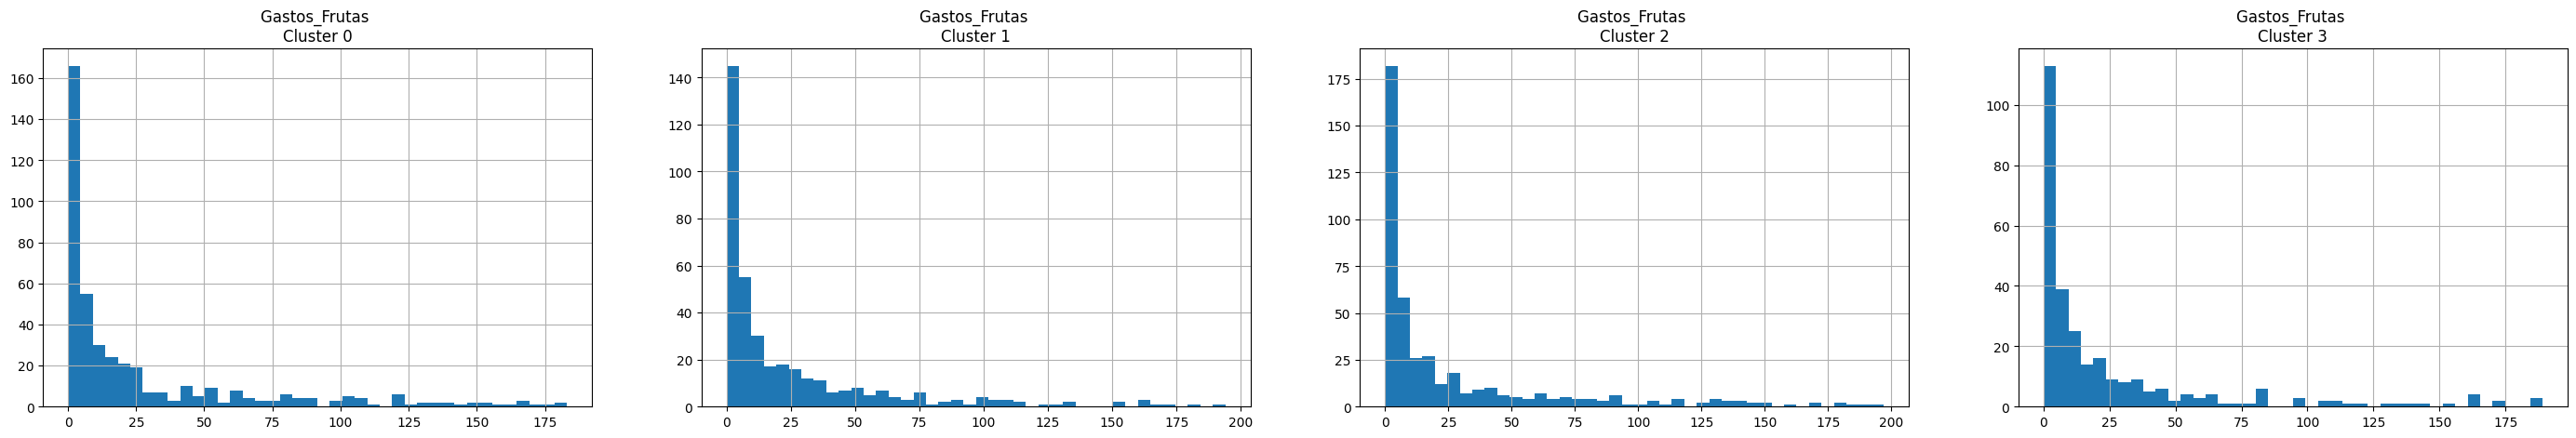

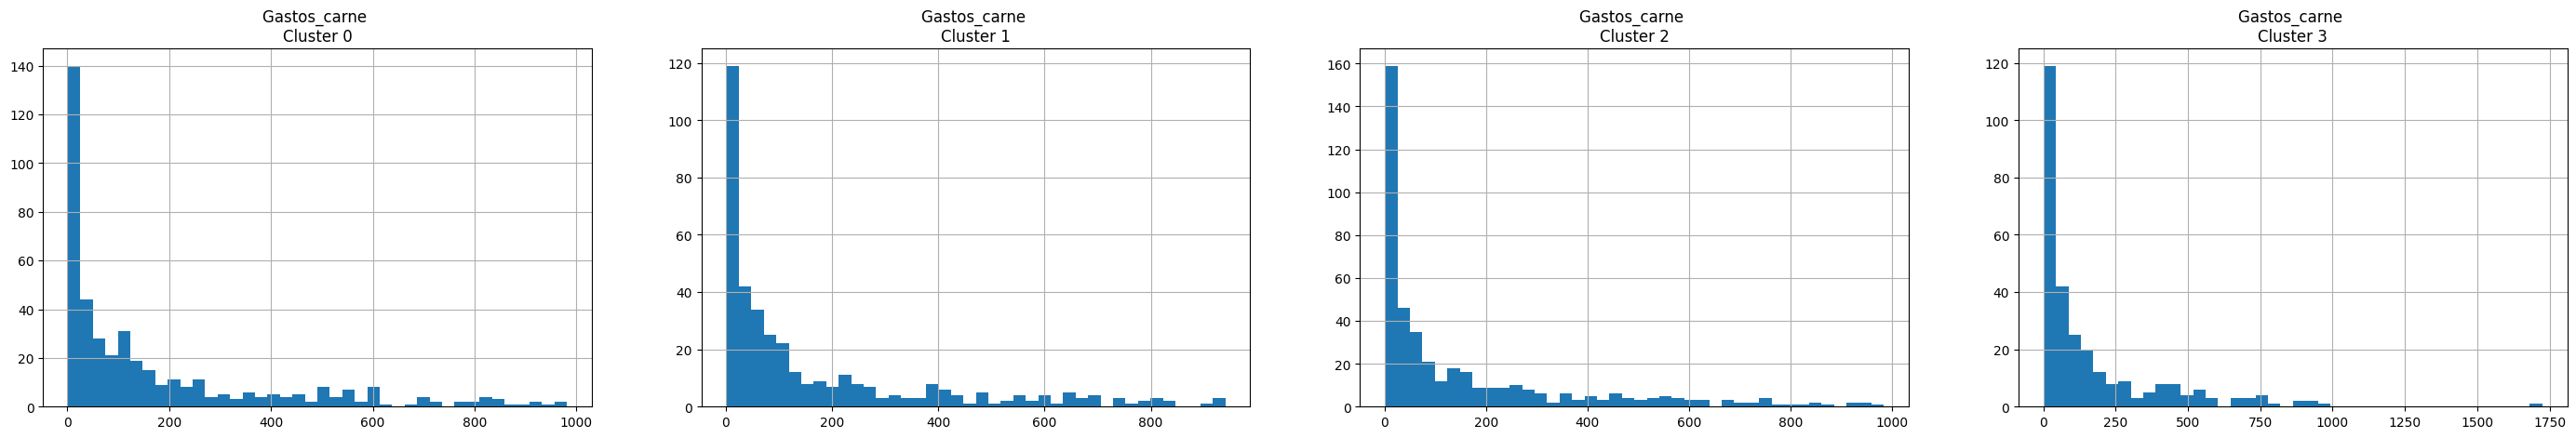

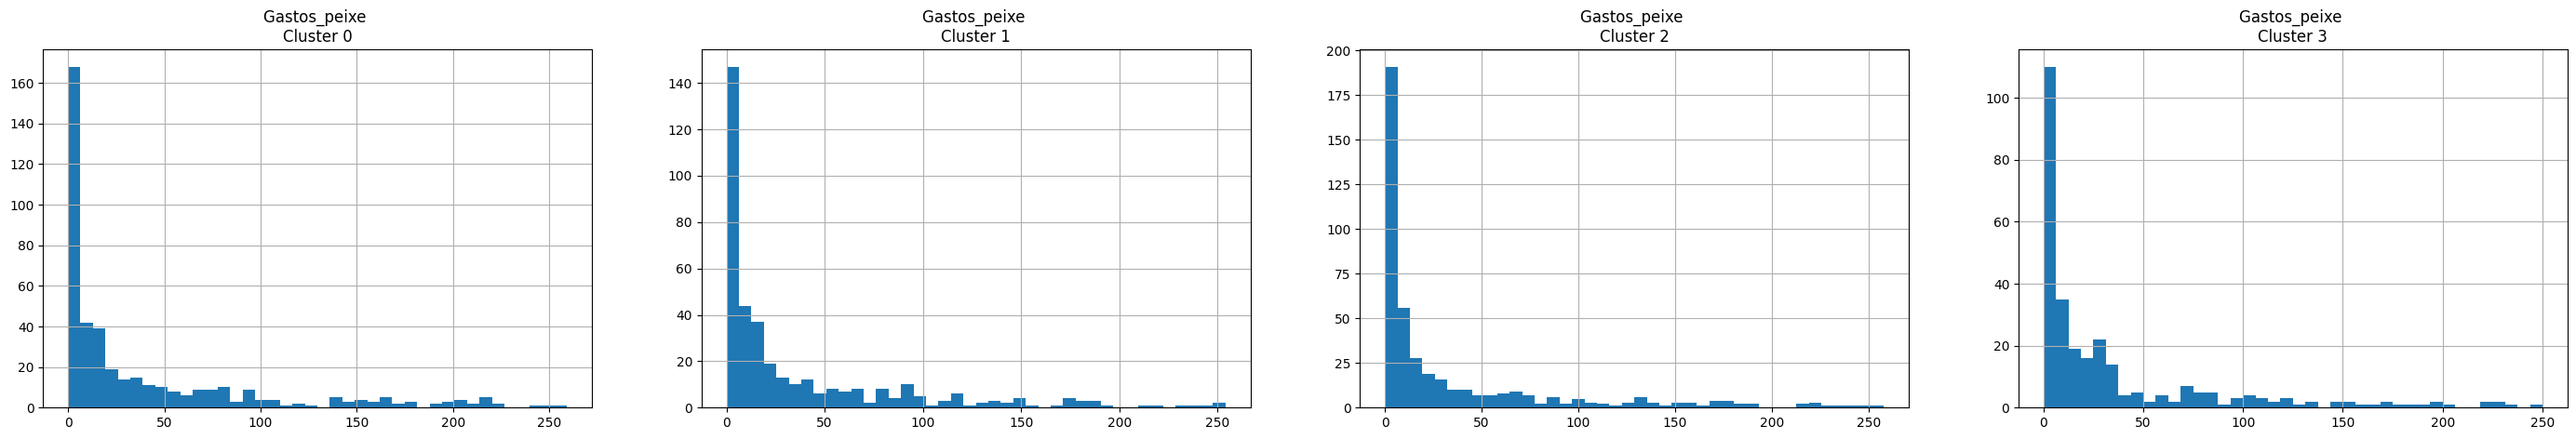

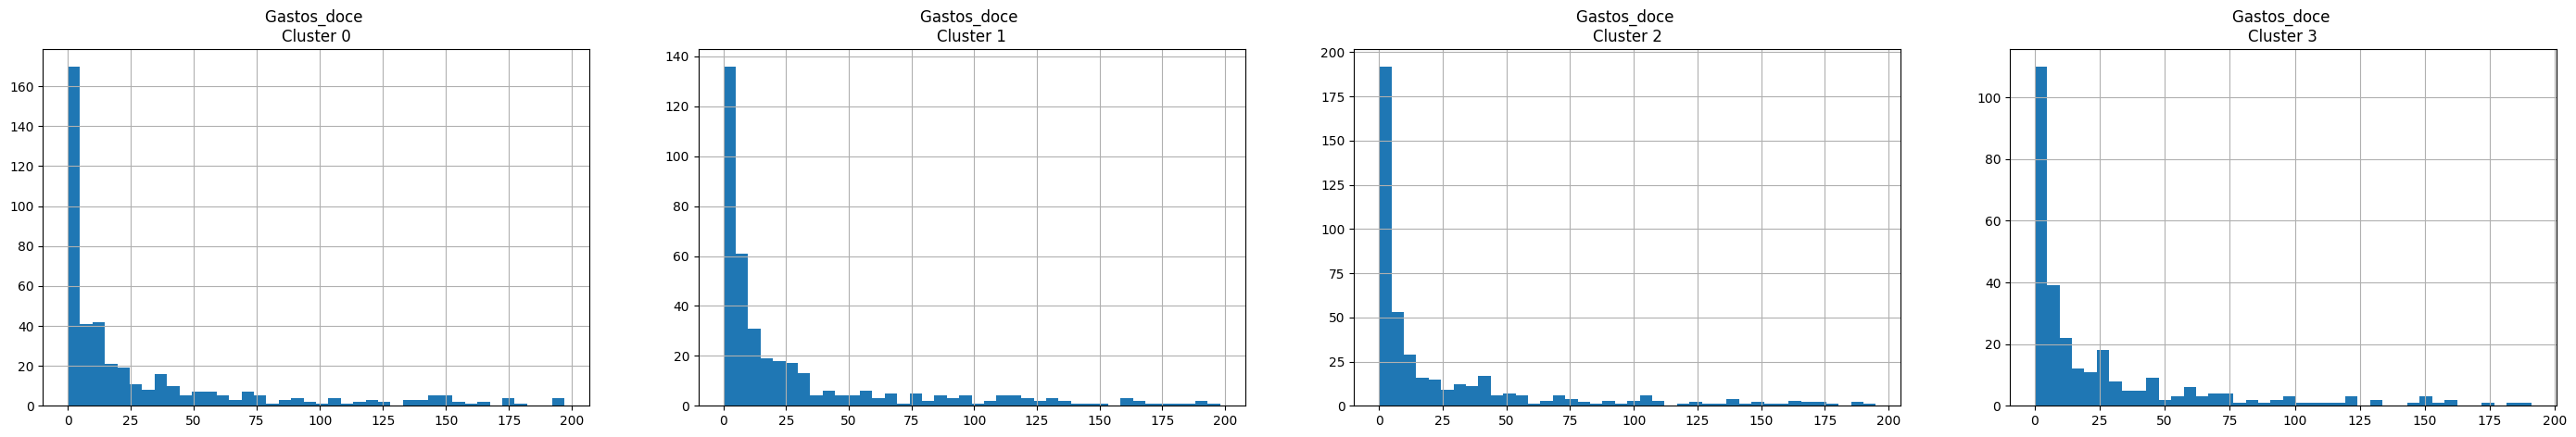

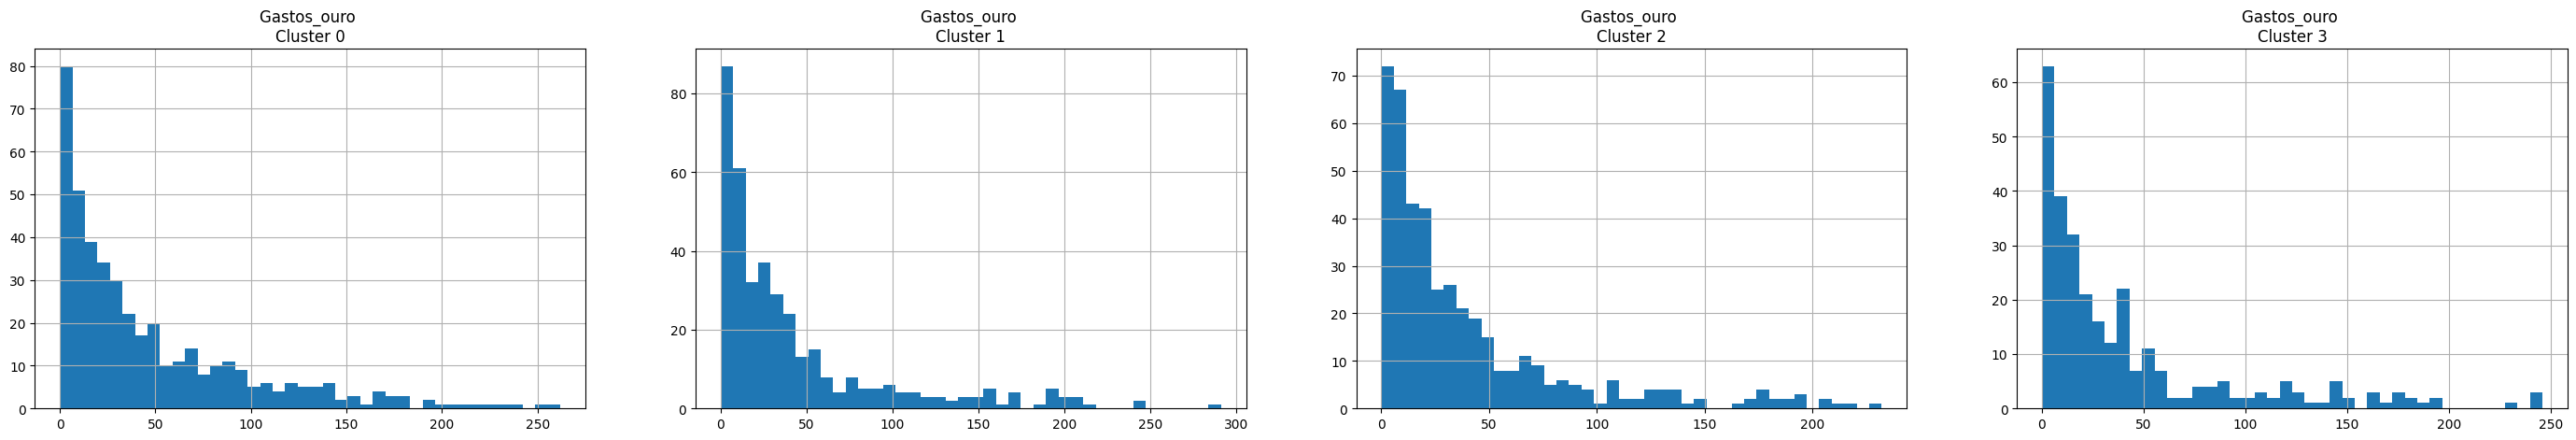

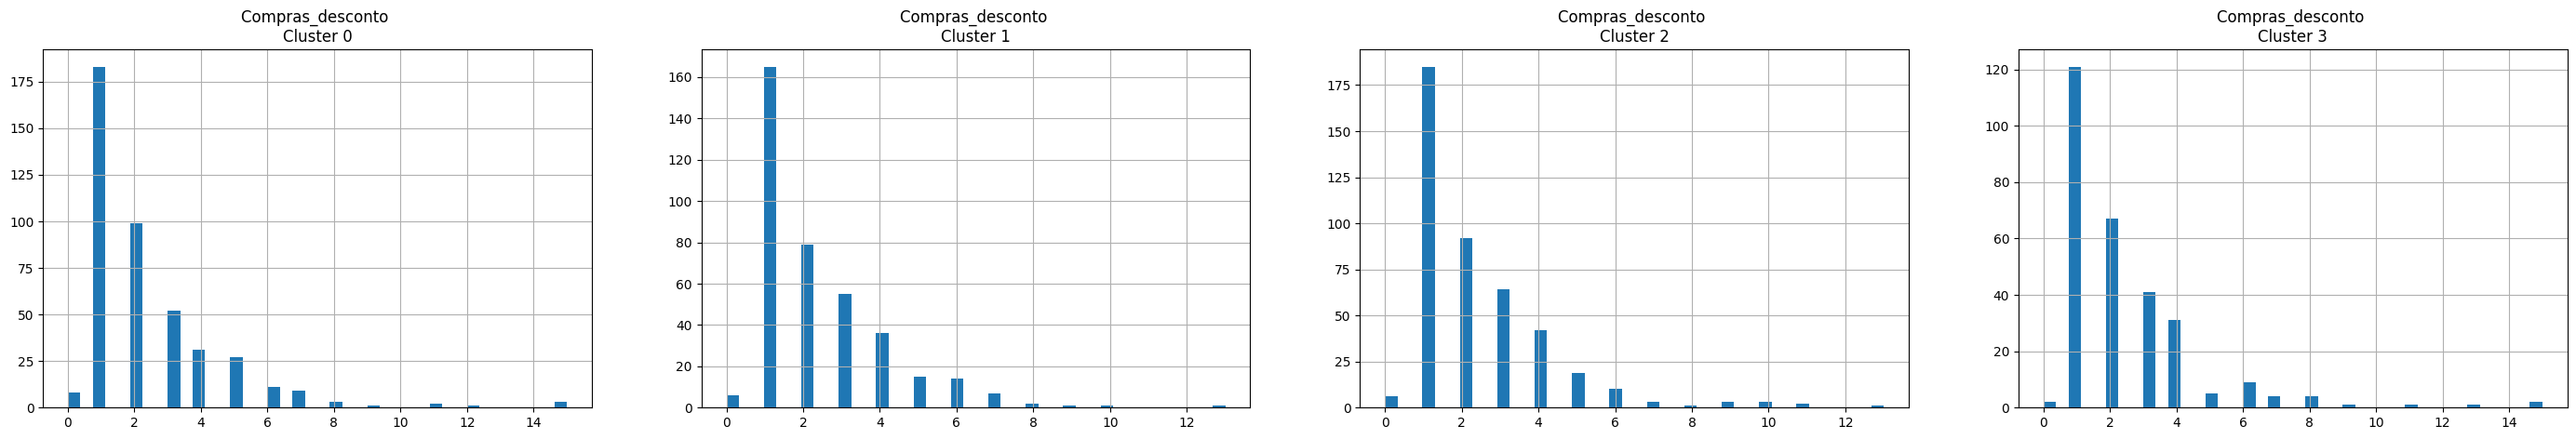

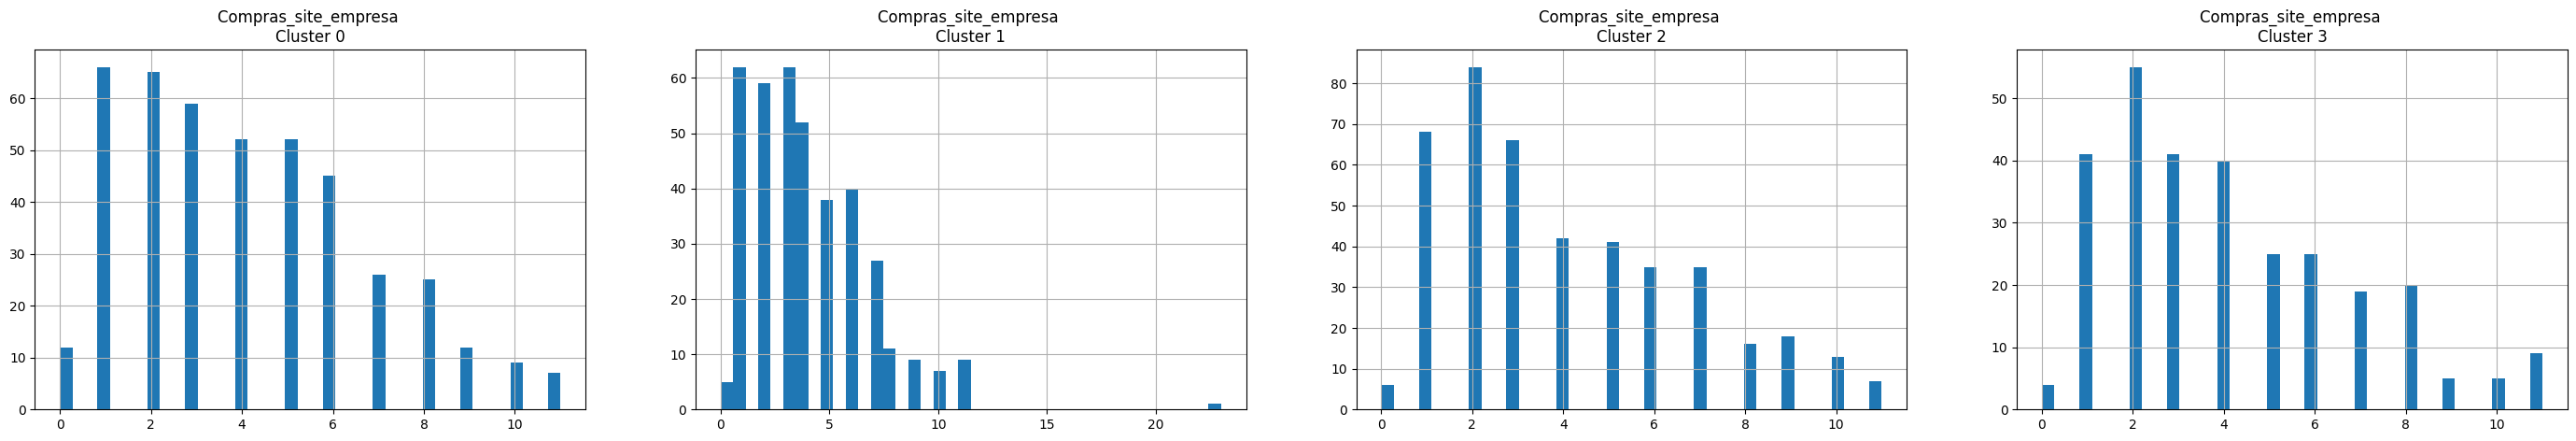

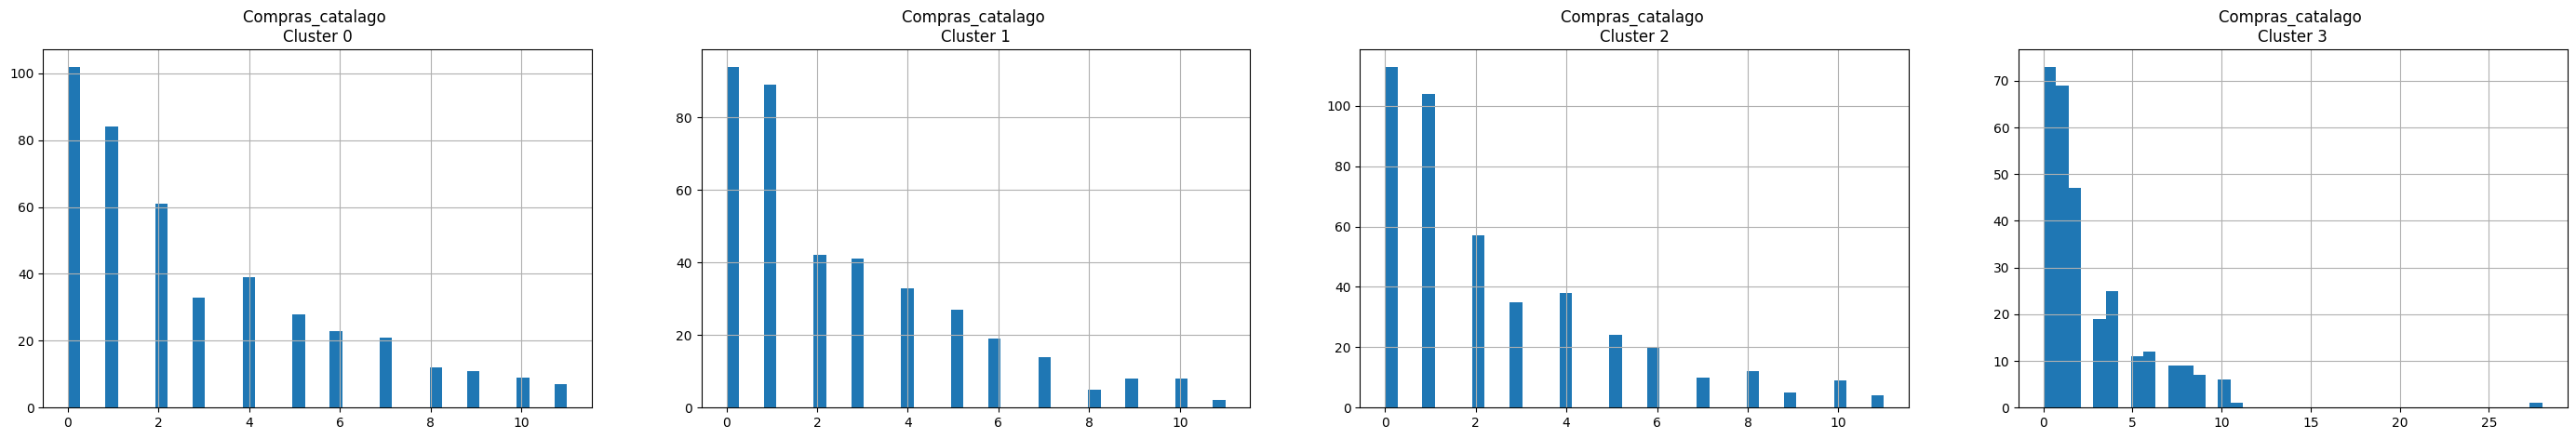

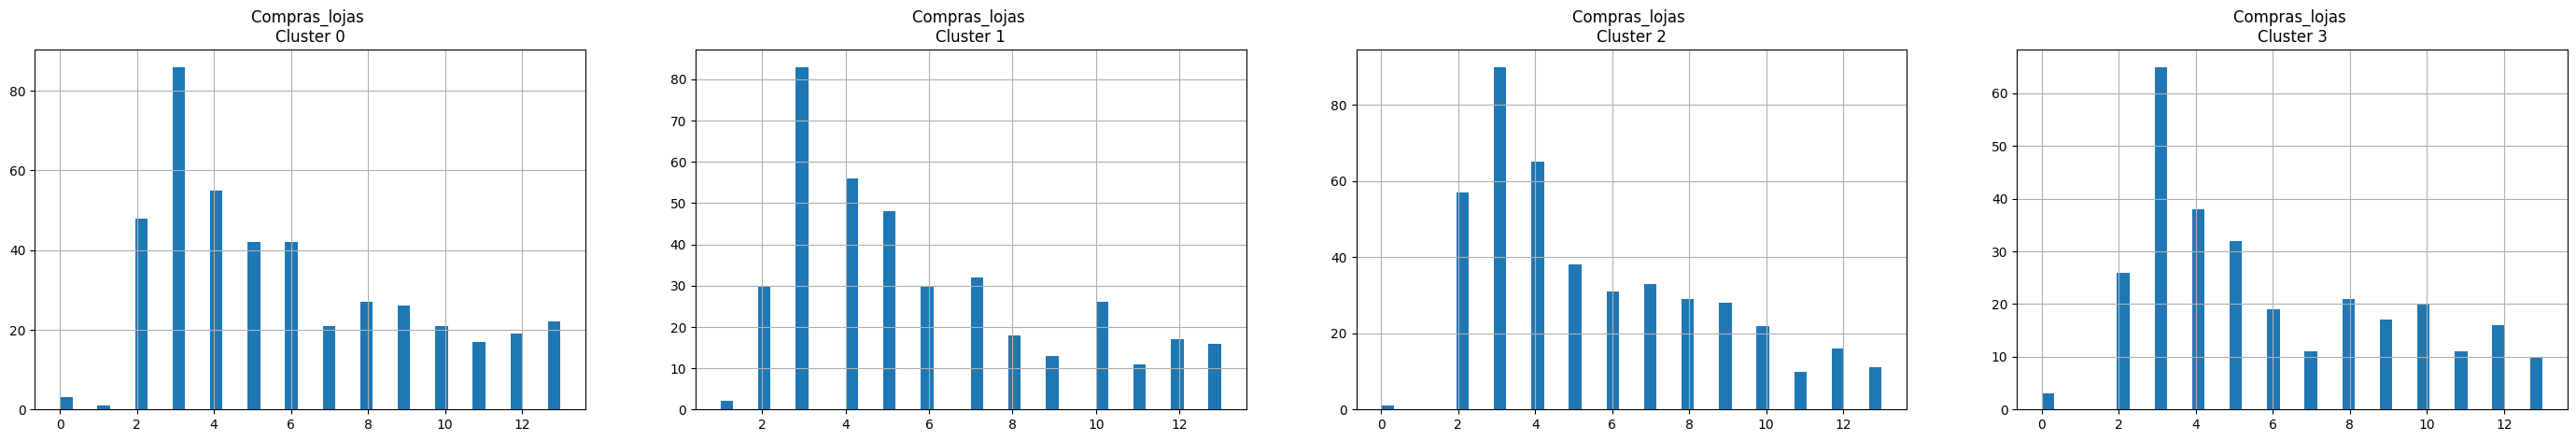

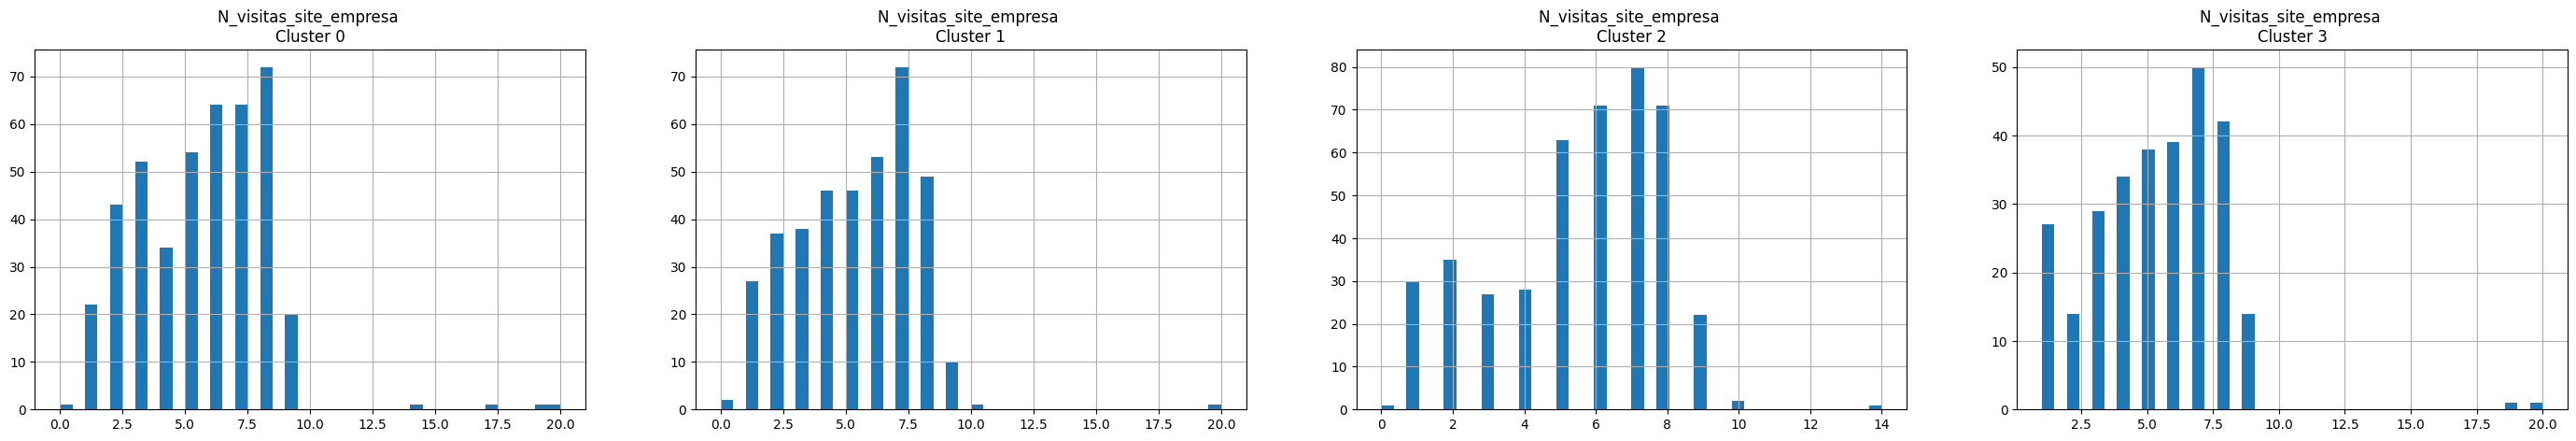

In [393]:
for i in if_renda.columns:
  plt.figure(figsize=(35,5))
  for j in range(4):
    plt.subplot(1, 4, j + 1)
    cluster =  ifood_df_cluster[ifood_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 40)
    plt.title('{} \nCluster {}'.format(i, j))

In [394]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 0]
fcluster.describe()

,Renda_anual,Idade,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa,cluster
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0
mean,52616.862791,51.165116,27.153488,173.927907,40.316279,29.737209,47.595349,2.411628,4.111628,2.902326,5.918605,5.413953,0.0
std,20990.126961,11.679807,40.452737,225.858408,57.848427,44.853590,51.715052,2.097919,2.614574,2.892760,3.351982,2.584838,0.0
min,1730.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,36090.750000,42.250000,2.000000,16.250000,2.250000,1.000000,11.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.0
50%,52541.000000,50.000000,8.500000,76.500000,13.000000,10.000000,28.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.0
75%,69959.250000,61.000000,32.750000,232.250000,55.750000,37.000000,68.750000,3.000000,6.000000,5.000000,8.000000,7.000000,0.0
max,105471.000000,77.000000,183.000000,981.000000,259.000000,197.000000,262.000000,15.000000,11.000000,11.000000,13.000000,20.000000,0.0


In [395]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 1]
fcluster.describe()

,Renda_anual,Idade,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa,cluster
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.0
mean,52365.170157,52.225131,24.311518,168.280105,36.316754,28.486911,42.939791,2.324607,4.068063,2.589005,5.845550,5.138743,1.0
std,19665.106571,11.314015,36.009911,219.245395,52.471131,43.059729,52.231004,1.765630,2.725514,2.636546,3.177962,2.401687,0.0
min,6835.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,37397.750000,44.000000,2.000000,19.000000,3.000000,2.000000,9.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.0
50%,51136.000000,52.000000,8.000000,69.000000,12.500000,9.000000,24.000000,2.000000,4.000000,2.000000,5.000000,5.000000,1.0
75%,68382.000000,61.000000,31.750000,230.000000,49.750000,32.000000,52.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.0
max,94871.000000,76.000000,194.000000,940.000000,254.000000,198.000000,291.000000,13.000000,23.000000,11.000000,13.000000,20.000000,1.0


In [396]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 2]
fcluster.describe()

,Renda_anual,Idade,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa,cluster
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.0
mean,50827.113689,50.324826,25.642691,157.387471,33.918794,25.380510,39.157773,2.331787,4.081206,2.459397,5.568445,5.554524,2.0
std,20099.289232,11.786524,40.054874,214.425746,53.639324,40.667786,45.794822,1.841103,2.693730,2.647965,3.085499,2.331019,0.0
min,3502.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,35455.500000,42.000000,1.000000,16.000000,2.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,2.0
50%,51411.000000,49.000000,7.000000,59.000000,8.000000,6.000000,23.000000,2.000000,3.000000,1.000000,5.000000,6.000000,2.0
75%,65527.500000,60.000000,30.000000,217.500000,40.000000,33.500000,49.000000,3.000000,6.000000,4.000000,8.000000,7.000000,2.0
max,102692.000000,79.000000,197.000000,984.000000,258.000000,195.000000,232.000000,13.000000,11.000000,11.000000,13.000000,14.000000,2.0


In [397]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 3]
fcluster.describe()

,Renda_anual,Idade,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa,cluster
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.0
mean,50339.865052,50.397924,24.923875,165.432526,35.920415,25.878893,42.249135,2.435986,4.138408,2.574394,5.930796,5.373702,3.0
std,21595.331899,11.441463,39.655300,231.299972,52.845397,38.480639,51.422071,2.092534,2.668270,3.066763,3.333654,2.588463,0.0
min,2447.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
25%,33812.000000,42.000000,1.000000,17.000000,3.000000,2.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,3.0
50%,50437.000000,49.000000,8.000000,67.000000,12.000000,9.000000,20.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0
75%,67023.000000,60.000000,29.000000,215.000000,38.000000,30.000000,52.000000,3.000000,6.000000,4.000000,9.000000,7.000000,3.0
max,102160.000000,74.000000,189.000000,1725.000000,250.000000,191.000000,246.000000,15.000000,11.000000,28.000000,13.000000,20.000000,3.0


Conclusão:

- Grupo 0: Possuem o maior indece medio da renda_anual, tem relativamento o indece de idade elavador, e tendem a gastar mais com alimentos, e fazem mais compras por catalago
- Grupo 1: Possuem o segundo maior indece medio da renda_anual, e o maior indece medio de idade, e tendem a gastar muito com alimetos 
- Grupo 2: Menores gastos com alimetos.
- Grupo 3: Possuem o menor indece medio de renda_anual


# 05 - Aplicação de PCA (principal component analysis) e visualização dos resultados

In [398]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(ifood_df_scaled)
principal_comp

array([[ 3.6068139 ,  0.95168052],
       [-1.84216575, -0.69479392],
       [ 1.73236464,  0.17151972],
       ...,
       [ 0.57953245, -0.66369803],
       [ 2.01068   ,  0.31097837],
       [-1.44896968,  0.48059201]])

In [399]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,3.606814,0.951681
1,-1.842166,-0.694794
2,1.732365,0.171520
3,-2.245667,-0.763283
4,0.102678,0.688734


In [400]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,3.606814,0.951681,2
1,-1.842166,-0.694794,0
2,1.732365,0.171520,1
3,-2.245667,-0.763283,3
4,0.102678,0.688734,2


In [401]:
pca_df.shape

(1843, 3)

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

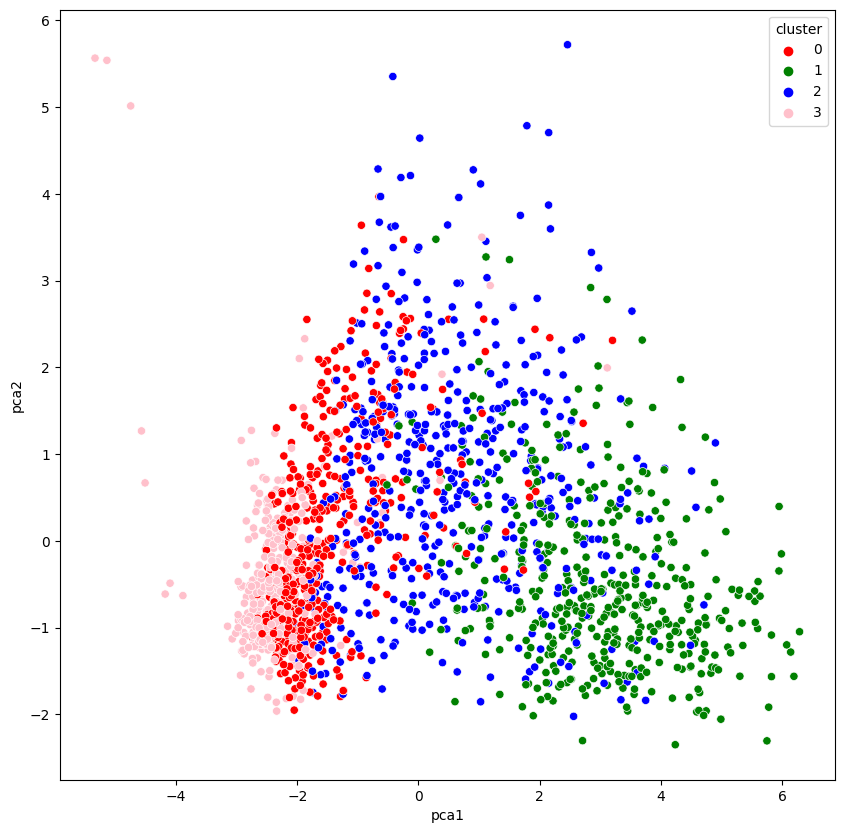

In [402]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [403]:
ifood_df_cluster.to_csv('ifood_cluster.csv')